In [50]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [51]:
### EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/zixili/Desktop/Brown/Fall 2024/DATA1030-Fall2024/final reports/hotel_bookings.csv') 
print(df.head())
df.head()

print(df.shape) 
print(df.dtypes) 
# good, no strings
df.describe()

# missing values
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Null Values Percentages' : (df.isna().sum()) / (df.shape[0]) * (100)})
print(null)
# children, country, agent (ID), company (ID)

# company refers to the ID of the company/entity that made the booking or responsible for paying the booking
# agent refers to the ID of the travel agency that made the booking
# therefore, we drop company & agent because we don't use ID variables in prediction
df.drop(columns=['company', 'agent'], inplace=True)
# drop rows in which children has null values because we only have 4 of these
df = df.dropna(subset=['children'])
# replace "Undefined" in the 'meal' column with "SC" (Self-Catering), which is equivalent
df["meal"] = df["meal"].replace("Undefined", "SC")
# drop rows where there are no guests (0 adults, 0 children, and 0 babies)
df = df[(df["adults"] + df["children"] + df["babies"]) > 0]

print(df.shape)
# for missing values under 'country', we'll deal with them with onehotencoder later in preprocessing

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



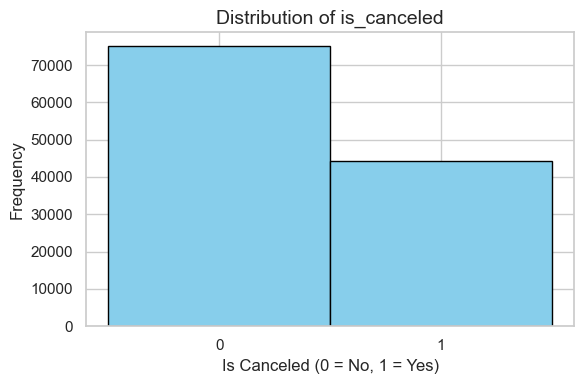

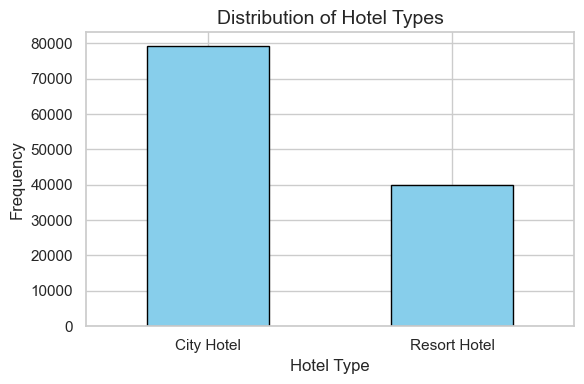

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:41: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



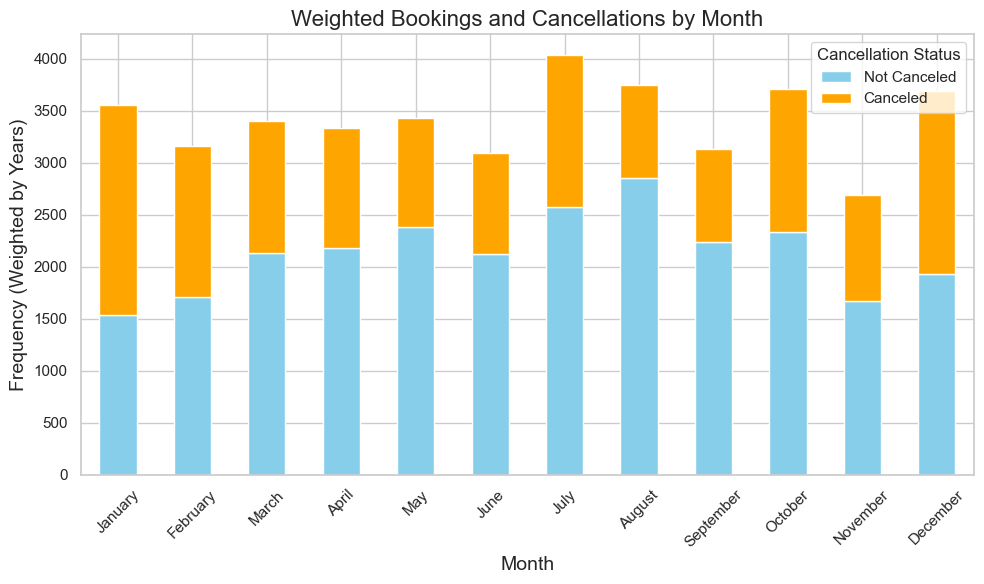

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:53: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:54: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



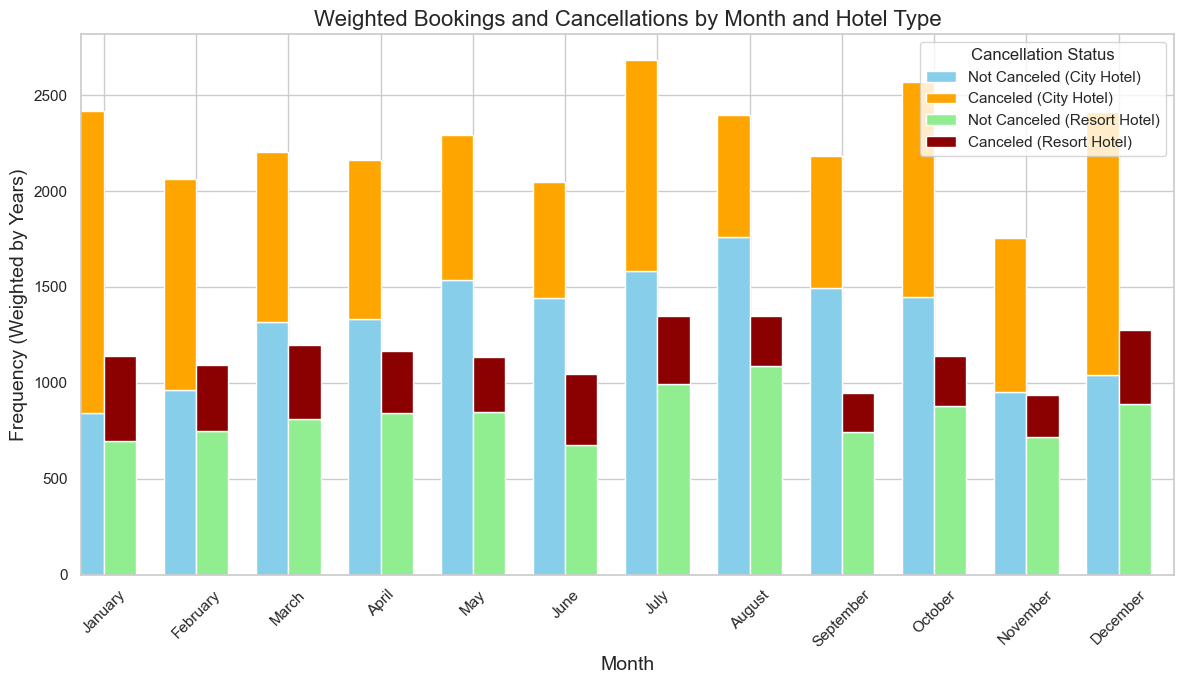

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:74: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:75: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



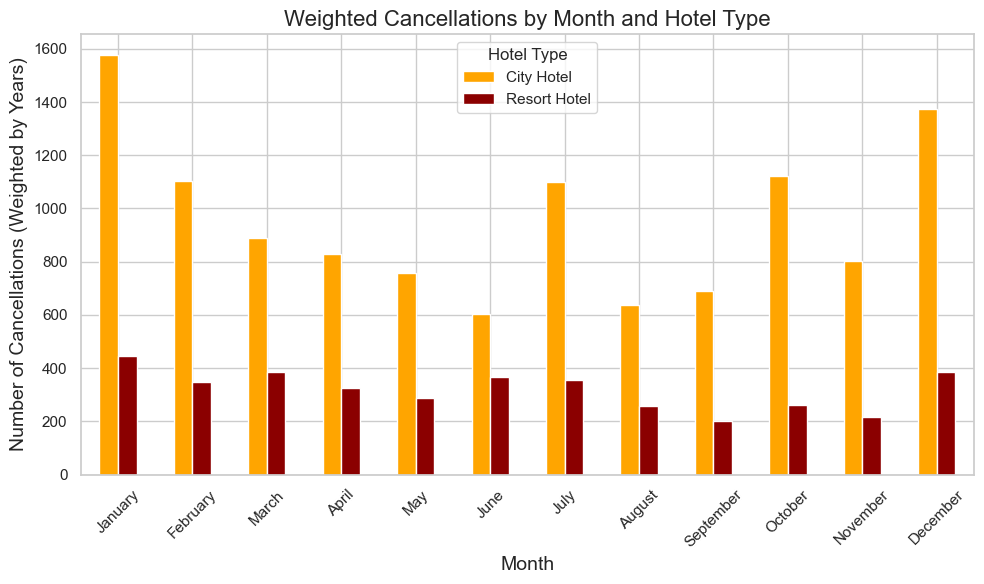

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:87: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



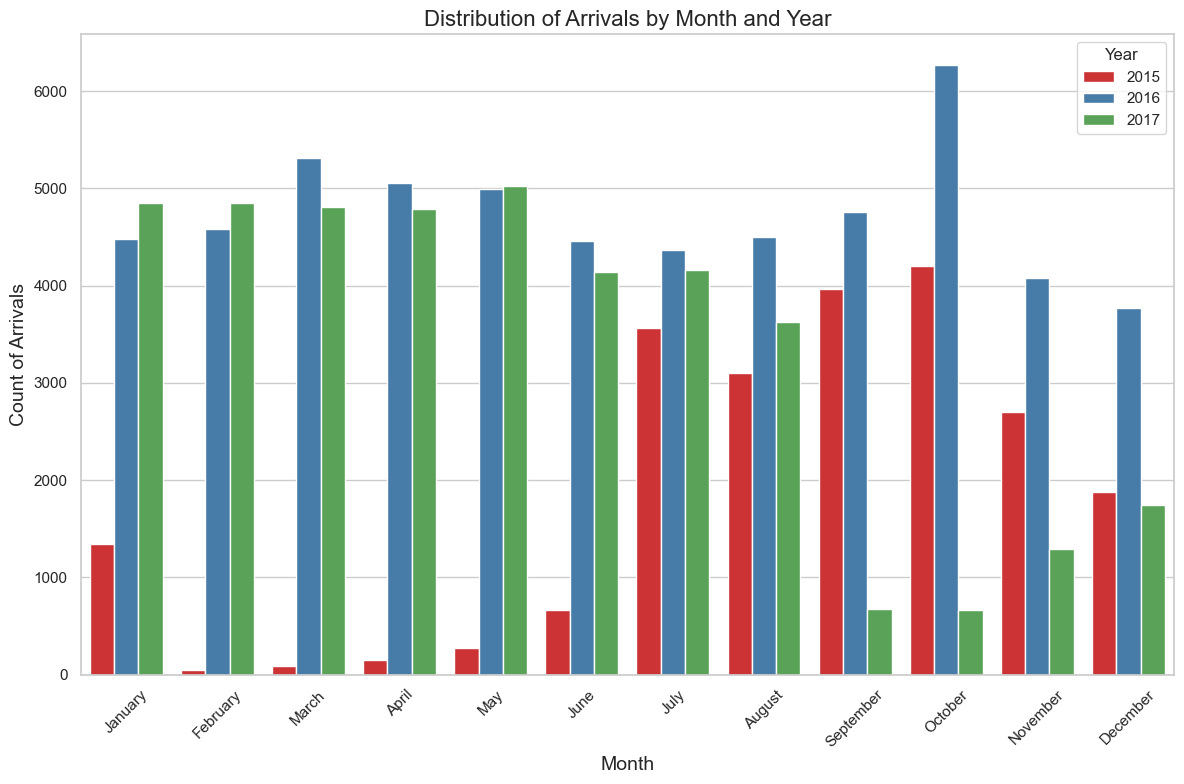

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/901361948.py:112: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




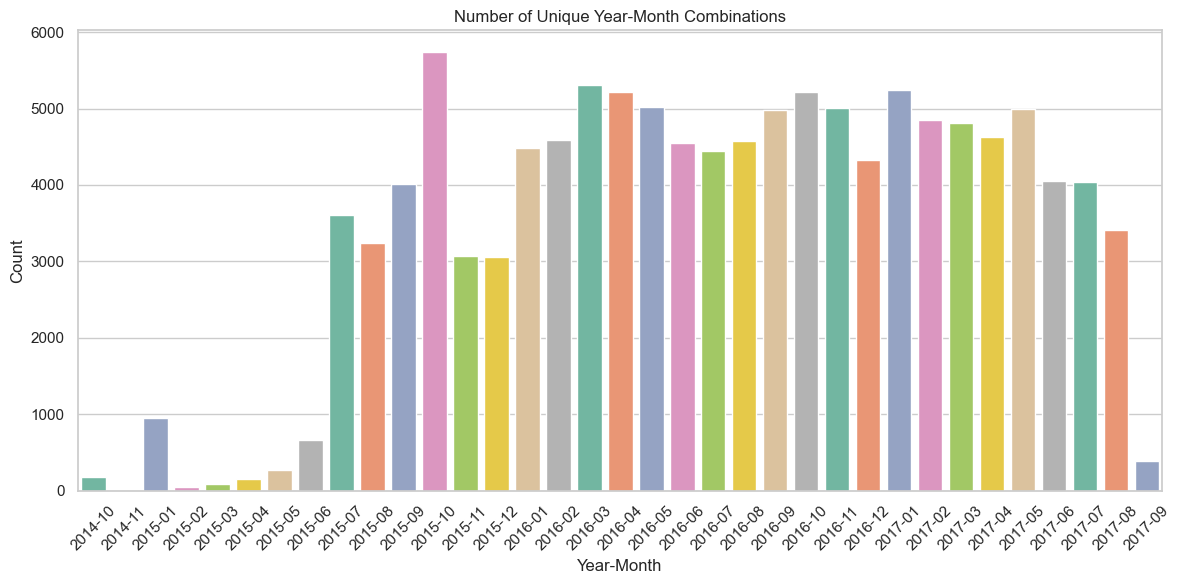

(119206, 33)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count',
       'year_month'],
      dtype='object')


In [52]:
# EDA 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['arrival_date_month'] = df['reservation_status_date'].dt.strftime('%B')  # Extract full month name

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

years_per_month = df.groupby('arrival_date_month')['year'].nunique().reset_index()
years_per_month.columns = ['arrival_date_month', 'year_count']

df = df.merge(years_per_month, on='arrival_date_month', how='left')

### Graph 1: Distribution of 'is_canceled' ###
plt.figure(figsize=(6, 4))
df['is_canceled'].hist(bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black', align='mid')
plt.title('Distribution of is_canceled', fontsize=14)
plt.xlabel('Is Canceled (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

### Graph 2: Distribution of hotel type ###
plt.figure(figsize=(6, 4))
df['hotel'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Hotel Types', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Graph 3: Bookings and cancellations by month (weighted by years)
cancellation_counts = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0)
cancellation_counts = cancellation_counts.div(df.groupby('arrival_date_month')['year_count'].mean(), axis=0)  # Weight by year count
cancellation_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Weighted Bookings and Cancellations by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Frequency (Weighted by Years)', fontsize=14)
plt.legend(['Not Canceled', 'Canceled'], title='Cancellation Status')
plt.tight_layout()
plt.show()

### Graph 4: Bookings and cancellations by month and hotel type (weighted by years)
cancellation_by_hotel = df.groupby(['arrival_date_month', 'hotel', 'is_canceled']).size().unstack(fill_value=0)
cancellation_by_hotel = cancellation_by_hotel.div(df.groupby('arrival_date_month')['year_count'].mean(), axis=0)

city_hotel = cancellation_by_hotel.xs('City Hotel', level='hotel')
resort_hotel = cancellation_by_hotel.xs('Resort Hotel', level='hotel')

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
city_hotel.plot(kind='bar', stacked=True, ax=ax, width=bar_width, position=1, color=['skyblue', 'orange'])
resort_hotel.plot(kind='bar', stacked=True, ax=ax, width=bar_width, position=0, color=['lightgreen', 'darkred'])
plt.title('Weighted Bookings and Cancellations by Month and Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Frequency (Weighted by Years)', fontsize=14)
plt.legend(['Not Canceled (City Hotel)', 'Canceled (City Hotel)', 
            'Not Canceled (Resort Hotel)', 'Canceled (Resort Hotel)'], title='Cancellation Status')
plt.tight_layout()
plt.show()

### Graph 5: Cancellations by month and hotel type (weighted by years) ###
canceled_data = df[df['is_canceled'] == 1]
cancellation_by_month_hotel = canceled_data.groupby(['arrival_date_month', 'hotel']).size().unstack(fill_value=0)
cancellation_by_month_hotel = cancellation_by_month_hotel.div(df.groupby('arrival_date_month')['year_count'].mean(), axis=0)

cancellation_by_month_hotel.plot(kind='bar', color=['orange', 'darkred'], figsize=(10, 6))
plt.title('Weighted Cancellations by Month and Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Cancellations (Weighted by Years)', fontsize=14)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

# Graph 6: Distribution of arrivals by arrival_date_month & arrival_date_year ###
arrival_grouped = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 8))

sns.barplot(x='arrival_date_month', y='count', hue='arrival_date_year', data=arrival_grouped, 
            palette='Set1', order=month_order)
plt.title('Distribution of Arrivals by Month and Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Arrivals', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')

plt.tight_layout()
plt.show()

# Graph 7: Year-month unique counts ###
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year_month'] = df['reservation_status_date'].dt.to_period('M').astype(str)

year_month_counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_month_counts.index, y=year_month_counts.values, palette='Set2')
plt.title('Number of Unique Year-Month Combinations')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(df.shape)
print(df.columns)


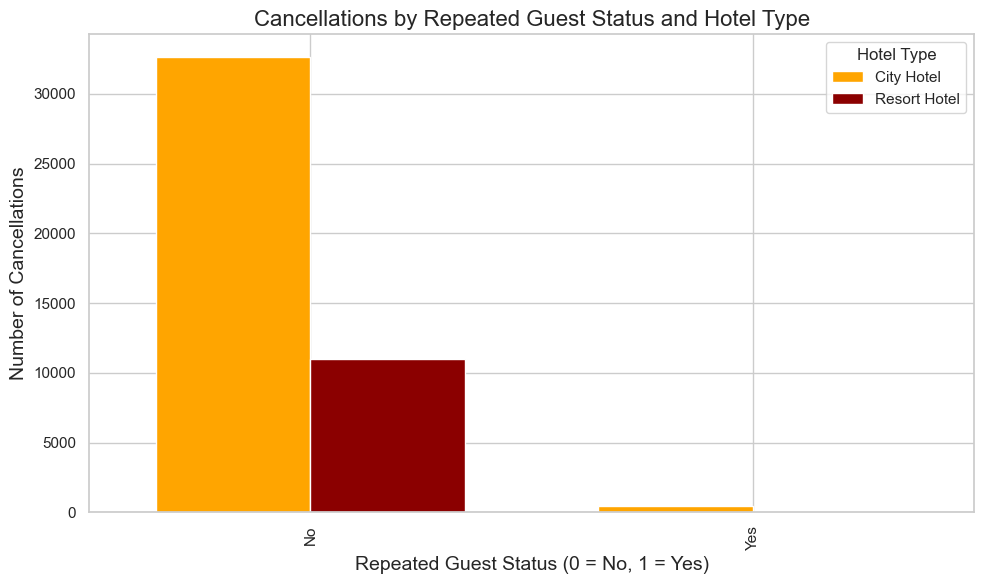

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/588771952.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/588771952.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/588771952.py:52: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

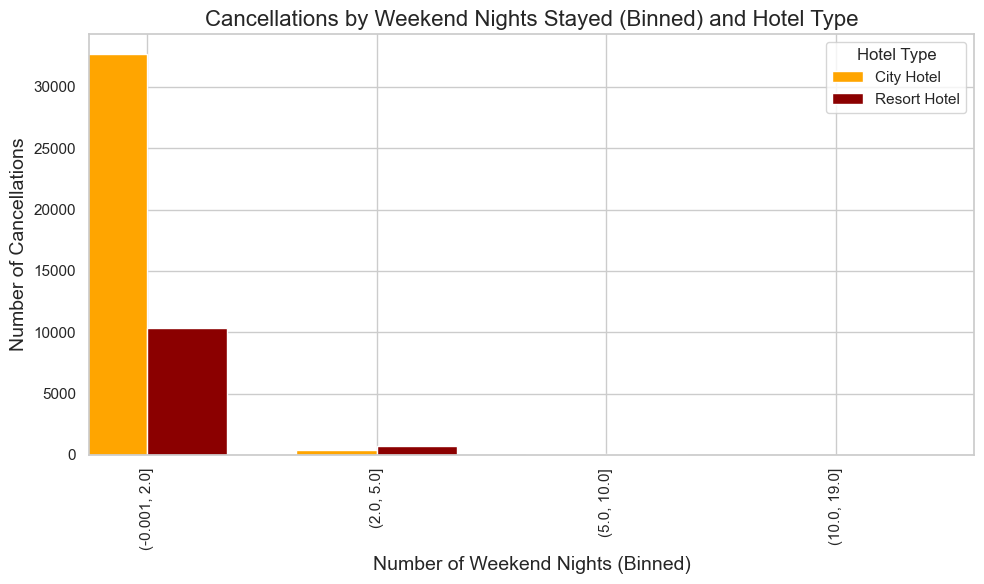

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/588771952.py:61: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



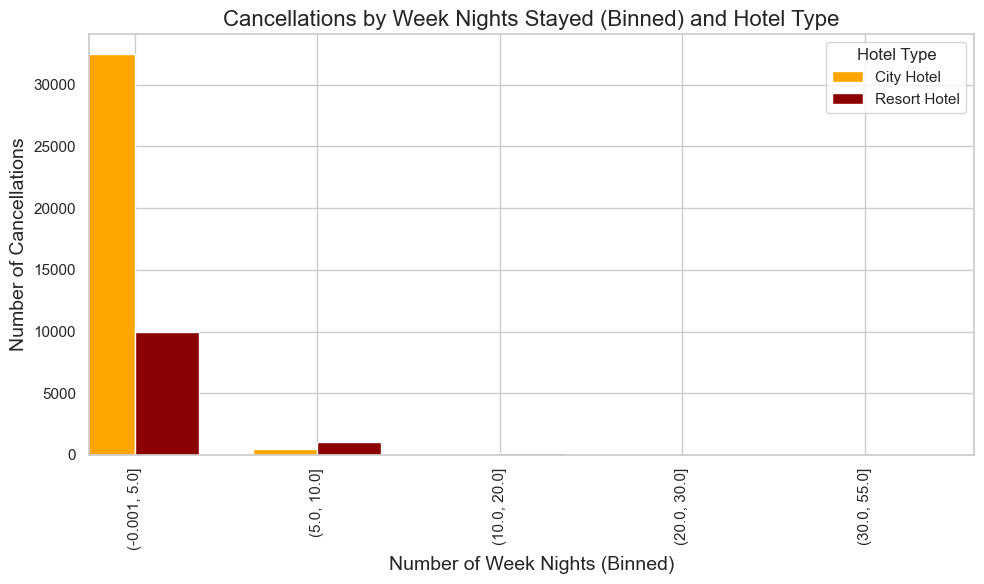

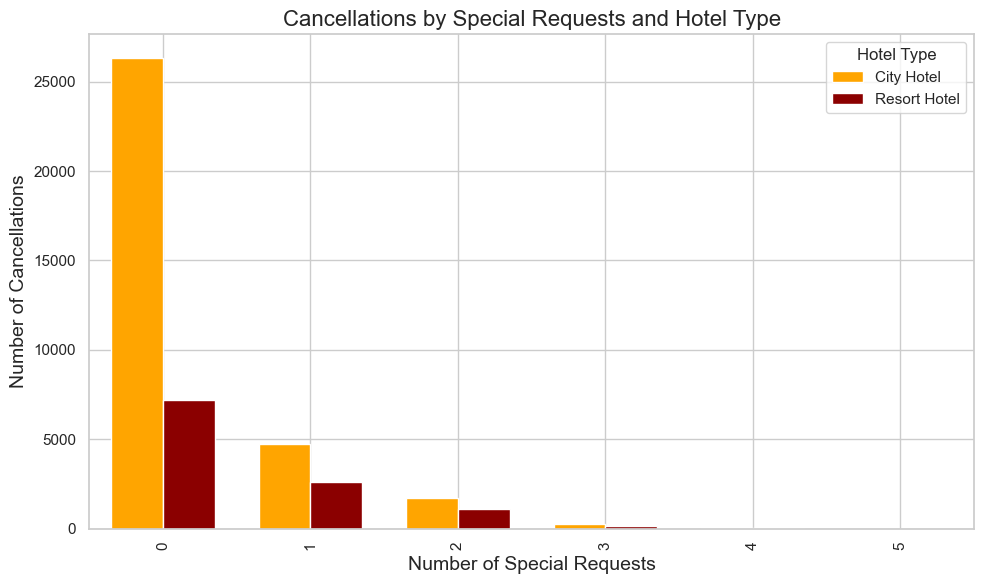

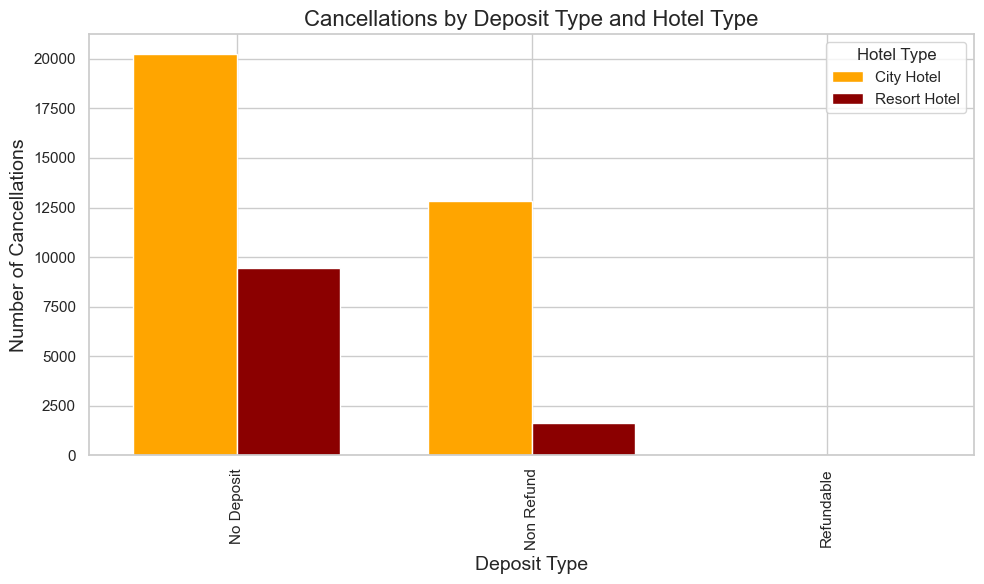

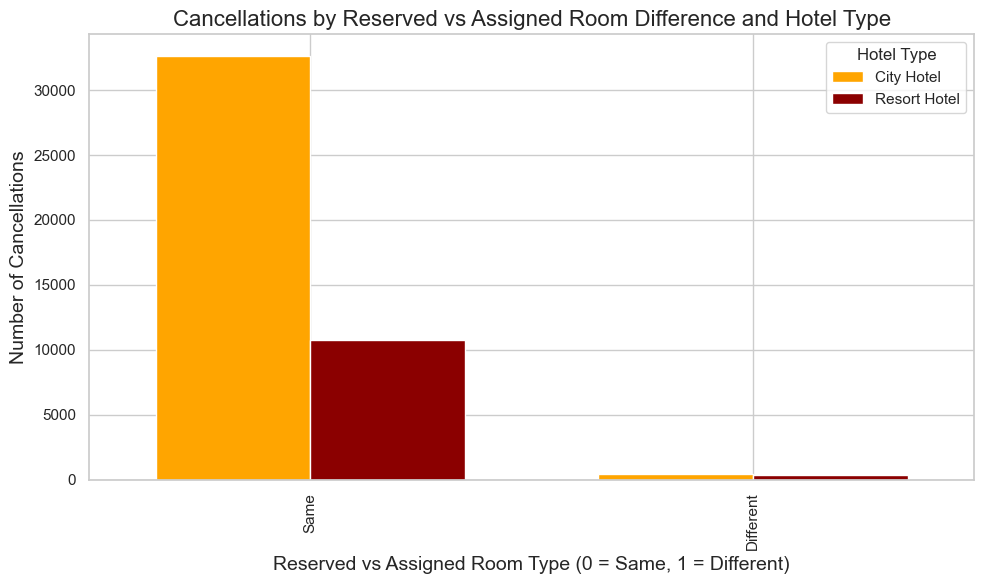

(119206, 34)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count',
       'year_month', 'differs_in_reserved_assigned'],
      dtype='object')


In [53]:
import seaborn as sns

sns.set(style="whitegrid")

canceled_df = df[df['is_canceled'] == 1]

# Define a function for side-by-side bar plots
def plot_side_by_side_bars(data, xlabel, ylabel, title, xticks=None, xlim=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35

    city_hotel = data.loc['City Hotel']
    resort_hotel = data.loc['Resort Hotel']

    city_hotel.plot(kind='bar', ax=ax, width=bar_width, position=1, color='orange', label="City Hotel")
    resort_hotel.plot(kind='bar', ax=ax, width=bar_width, position=0, color='darkred', label="Resort Hotel")

    if xlim:
        plt.xlim(xlim)

    if xticks is not None: 
        ax.set_xticks(range(len(xticks)))
        ax.set_xticklabels(list(xticks)) 

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Hotel Type')
    plt.tight_layout()
    plt.show()

### Graph 1: Cancellation by `is_repeated_guest` by hotel type ###
cancellation_by_repeated_guest = canceled_df.groupby(['hotel', 'is_repeated_guest']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_repeated_guest,
    xlabel='Repeated Guest Status (0 = No, 1 = Yes)',
    ylabel='Number of Cancellations',
    title='Cancellations by Repeated Guest Status and Hotel Type',
    xticks=['No', 'Yes'],
    xlim=[-0.5, 1.5]
)

# Define bins for both stays_in_weekend_nights and stays_in_week_nights
bins_weekend = [0, 2, 5, 10, 19]
bins_week = [0, 5, 10, 20, 30, 55]

# Bin the data
canceled_df['binned_weekend'] = pd.cut(canceled_df['stays_in_weekend_nights'], bins=bins_weekend, include_lowest=True)
canceled_df['binned_week'] = pd.cut(canceled_df['stays_in_week_nights'], bins=bins_week, include_lowest=True)

### Graph 2: Cancellations by `stays_in_weekend_nights` (Binned) by hotel type
cancellation_by_weekend_binned = canceled_df.groupby(['hotel', 'binned_weekend']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_weekend_binned,
    xlabel='Number of Weekend Nights (Binned)',
    ylabel='Number of Cancellations',
    title='Cancellations by Weekend Nights Stayed (Binned) and Hotel Type'
)

### Graph 3: Cancellations by `stays_in_week_nights` (Binned) by hotel type
cancellation_by_week_binned = canceled_df.groupby(['hotel', 'binned_week']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_week_binned,
    xlabel='Number of Week Nights (Binned)',
    ylabel='Number of Cancellations',
    title='Cancellations by Week Nights Stayed (Binned) and Hotel Type'
)

### Graph 4: Cancellation by `total_of_special_requests` by hotel type ###
cancellation_by_special_requests = canceled_df.groupby(['hotel', 'total_of_special_requests']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_special_requests,
    xlabel='Number of Special Requests',
    ylabel='Number of Cancellations',
    title='Cancellations by Special Requests and Hotel Type',
    xlim=[-0.5, 5.5]
)

### Graph 5: Cancellation by `deposit_type` by hotel type
cancellation_by_deposit_type = canceled_df.groupby(['hotel', 'deposit_type']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_deposit_type,
    xlabel='Deposit Type',
    ylabel='Number of Cancellations',
    title='Cancellations by Deposit Type and Hotel Type',
    xticks=list(cancellation_by_deposit_type.columns), 
    xlim=[-0.5, 2.5]
)

### Graph 6: Cancellation by `differs_in_reserved_assigned` by hotel type
df['differs_in_reserved_assigned'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
canceled_df = df[df['is_canceled'] == 1]
cancellation_by_differs_in_assigned = canceled_df.groupby(['hotel', 'differs_in_reserved_assigned']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_differs_in_assigned,
    xlabel='Reserved vs Assigned Room Type (0 = Same, 1 = Different)',
    ylabel='Number of Cancellations',
    title='Cancellations by Reserved vs Assigned Room Difference and Hotel Type',
    xticks=['Same', 'Different'],
    xlim=[-0.5, 1.5]
)


print(df.shape)
print(df.columns)

              hotel  is_canceled  lead_time  arrival_date_year  \
14962  Resort Hotel            0        195               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14962              March                        10                          5   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
14962                        4                     6       2  ...   

         customer_type   adr required_car_parking_spaces  \
14962  Transient-Party -6.38                           0   

      total_of_special_requests reservation_status reservation_status_date  \
14962                         0          Check-Out              2017-03-15   

       year  year_count  year_month differs_in_reserved_assigned  
14962  2017           3     2017-03                            1  

[1 rows x 34 columns]
(119205, 34)


/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/2952441061.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




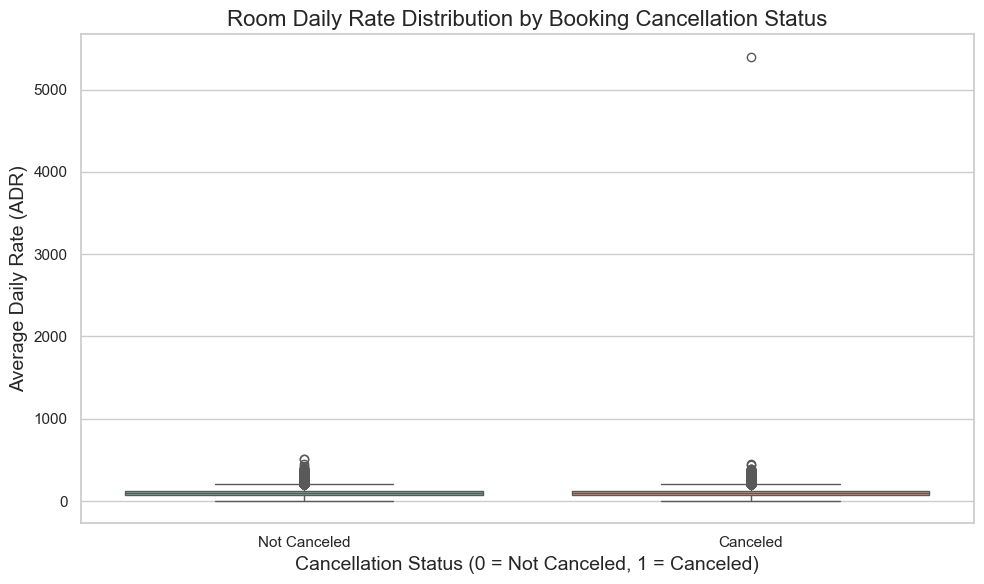

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/2952441061.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




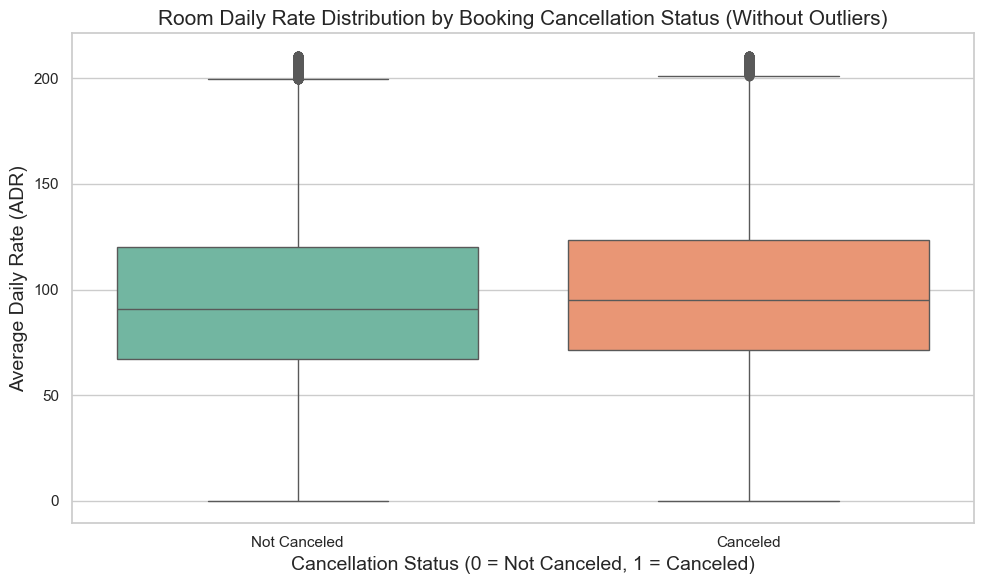

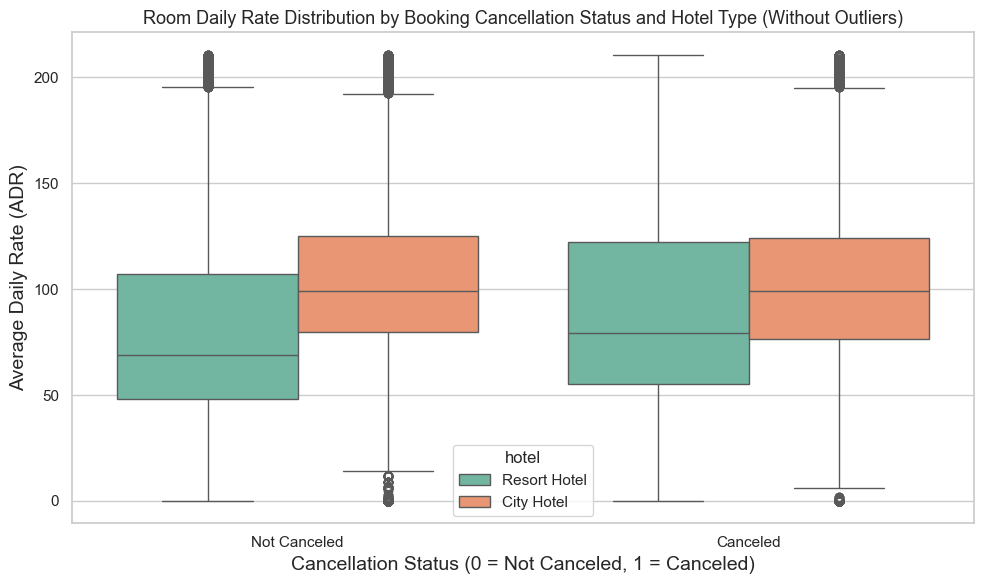

(119205, 34)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count',
       'year_month', 'differs_in_reserved_assigned'],
      dtype='object')


In [54]:
# Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
df['adr'].describe()
# why are there negative numbers?
negative_adr = df[df['adr'] < 0]
print(negative_adr)
# only 1 row, and we don't know the sum of all lodging transactions so we can't figure out exactly why
# therefore we drop this row
# drop rows where 'adr' is negative
df = df[df['adr'] >= 0]
print(df.shape)

### Graph 1: Cancellation by room raily rate ###
plt.figure(figsize=(10, 6))
sns.boxplot(x="is_canceled", y="adr", data=df, palette="Set2")

plt.title("Room Daily Rate Distribution by Booking Cancellation Status", fontsize=16)
plt.xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)", fontsize=14)
plt.ylabel("Average Daily Rate (ADR)", fontsize=14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

### Graph 2: Cancellation by room daily rate (but took care of outliers in adr) ###
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# following the 1.5IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x="is_canceled", y="adr", data=df_no_outliers, palette="Set2")
plt.title("Room Daily Rate Distribution by Booking Cancellation Status (Without Outliers)", fontsize=15)
plt.xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)", fontsize=14)
plt.ylabel("Average Daily Rate (ADR)", fontsize=14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

### Graph 3: Cancellation by room daily rate and hotel type (took care of outliers) ###
plt.figure(figsize=(10, 6))
sns.boxplot(x="is_canceled", y="adr", hue="hotel", data=df_no_outliers, palette="Set2")

plt.title("Room Daily Rate Distribution by Booking Cancellation Status and Hotel Type (Without Outliers)", fontsize=13)
plt.xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)", fontsize=14)
plt.ylabel("Average Daily Rate (ADR)", fontsize=14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

print(df.shape)
print(df.columns)

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/2115542297.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




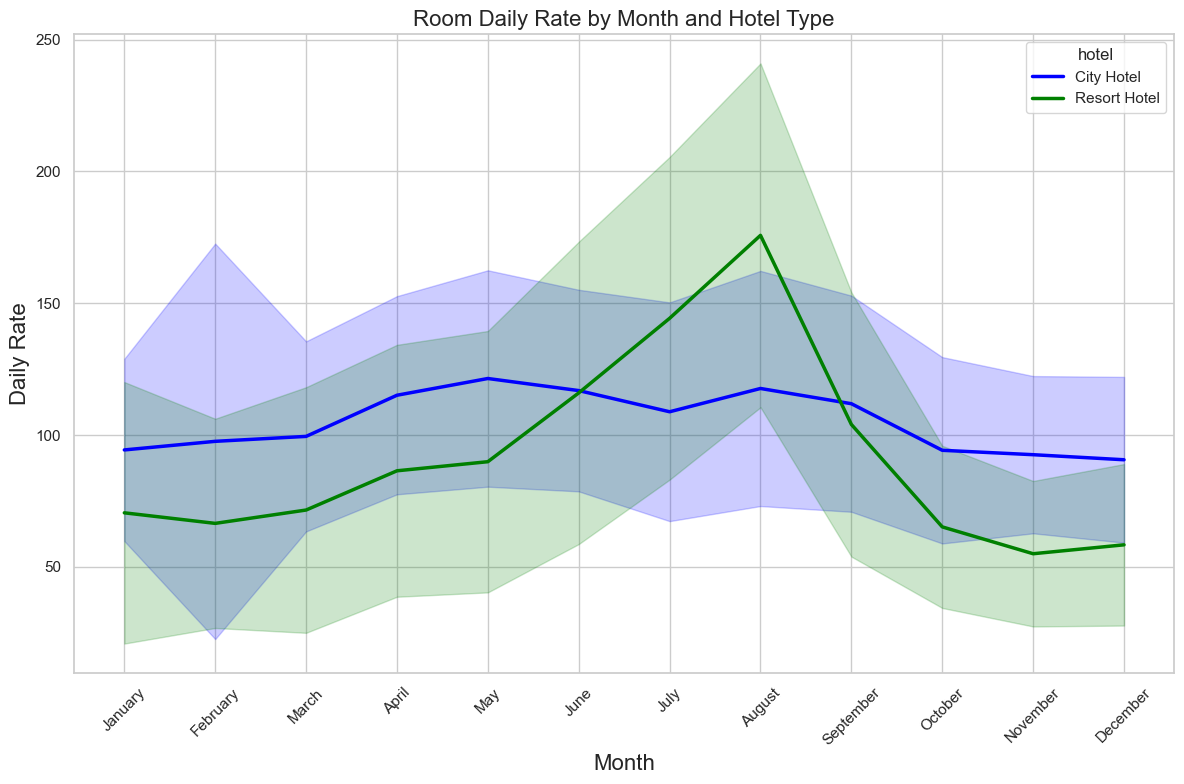

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/2115542297.py:38: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




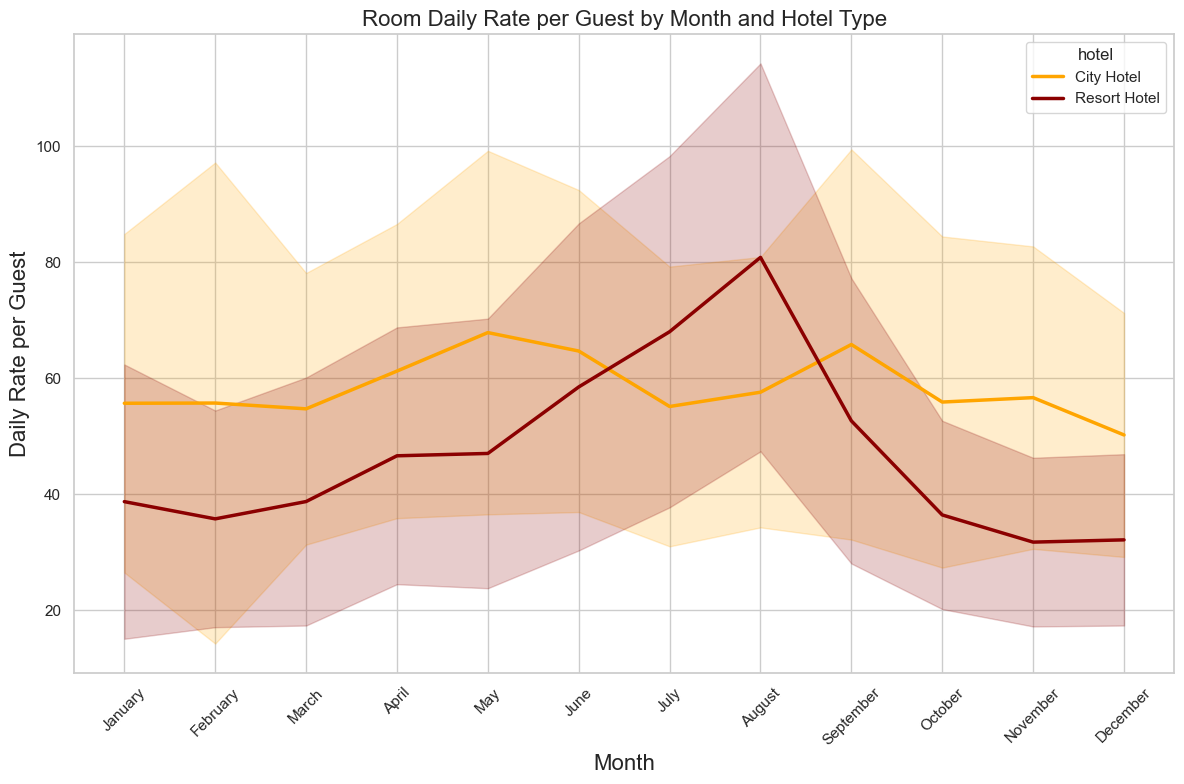

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/2115542297.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



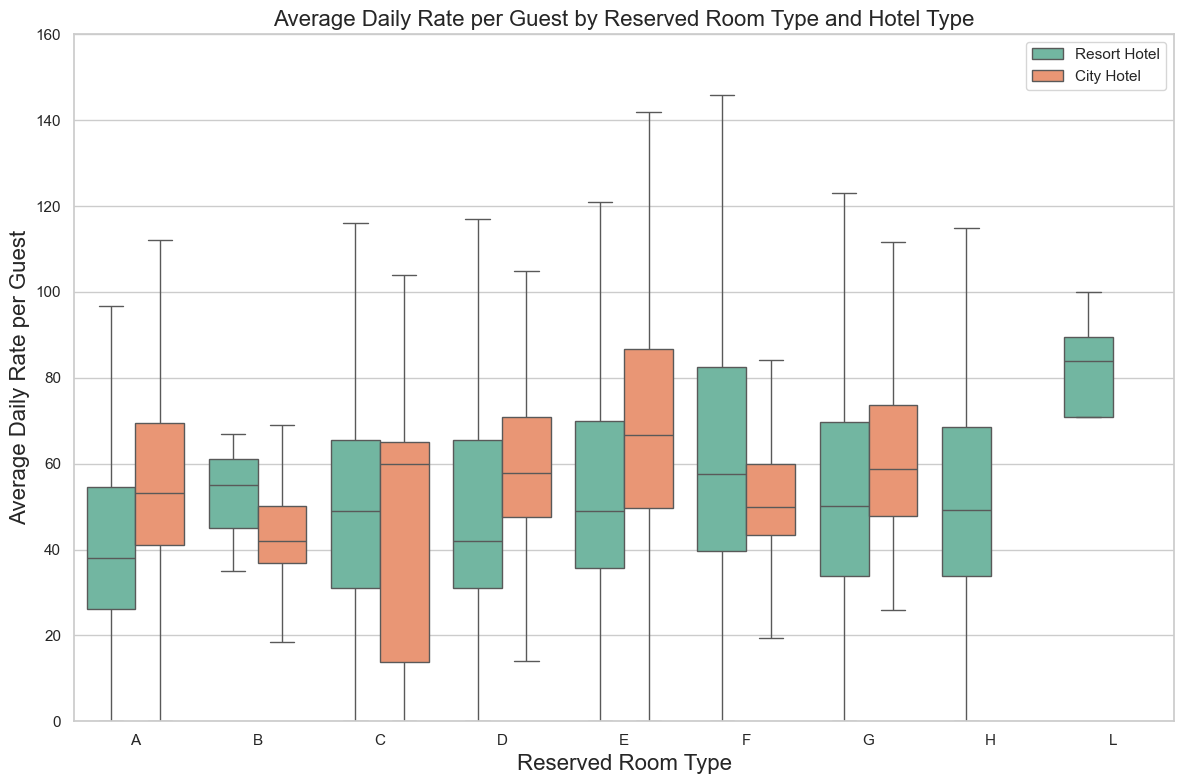

In [55]:
### Graph 1: Room daily rate by month and hotel type
room_prices_monthly = df[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], 
                                                           categories=month_order, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x="arrival_date_month", y="adr", hue="hotel", data=room_prices_monthly, 
             hue_order=["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5), 
             palette={"City Hotel": "blue", "Resort Hotel": "green"}) 

plt.title("Room Daily Rate by Month and Hotel Type", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Daily Rate", fontsize=16)
plt.tight_layout()
plt.show()

### Graph 2: Room daily rate per guest by month and hotel type ###
df['total_guests'] = df['adults'] + df['children']
df['total_guests'] = df['total_guests'].replace(0, 1) 

df['adr_pp'] = df['adr'] / df['total_guests']

room_prices_pp_monthly = df[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

room_prices_pp_monthly["arrival_date_month"] = pd.Categorical(room_prices_pp_monthly["arrival_date_month"], 
                                                           categories=month_order, ordered=True)

plt.figure(figsize=(12, 8))

sns.lineplot(x="arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_pp_monthly, 
             hue_order=["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5), 
             palette={"City Hotel": "orange", "Resort Hotel": "darkred"})  

plt.title("Room Daily Rate per Guest by Month and Hotel Type", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Daily Rate per Guest", fontsize=16)

plt.tight_layout()
plt.show()

### Graph 3: Room daily rate per guest by reserved room type and hotel type (only those not cancelled) ###
non_canceled_df = df[df['is_canceled'] == 0]

non_canceled_df['adr_pp'] = non_canceled_df['adr'] / (non_canceled_df['adults'] + non_canceled_df['children'])

room_prices = non_canceled_df[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices,
            hue_order=["Resort Hotel", "City Hotel"],
            palette='Set2',
            fliersize=0)

plt.title("Average Daily Rate per Guest by Reserved Room Type and Hotel Type", fontsize=16)
plt.xlabel("Reserved Room Type", fontsize=16)
plt.ylabel("Average Daily Rate per Guest", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)

plt.tight_layout()
plt.show()

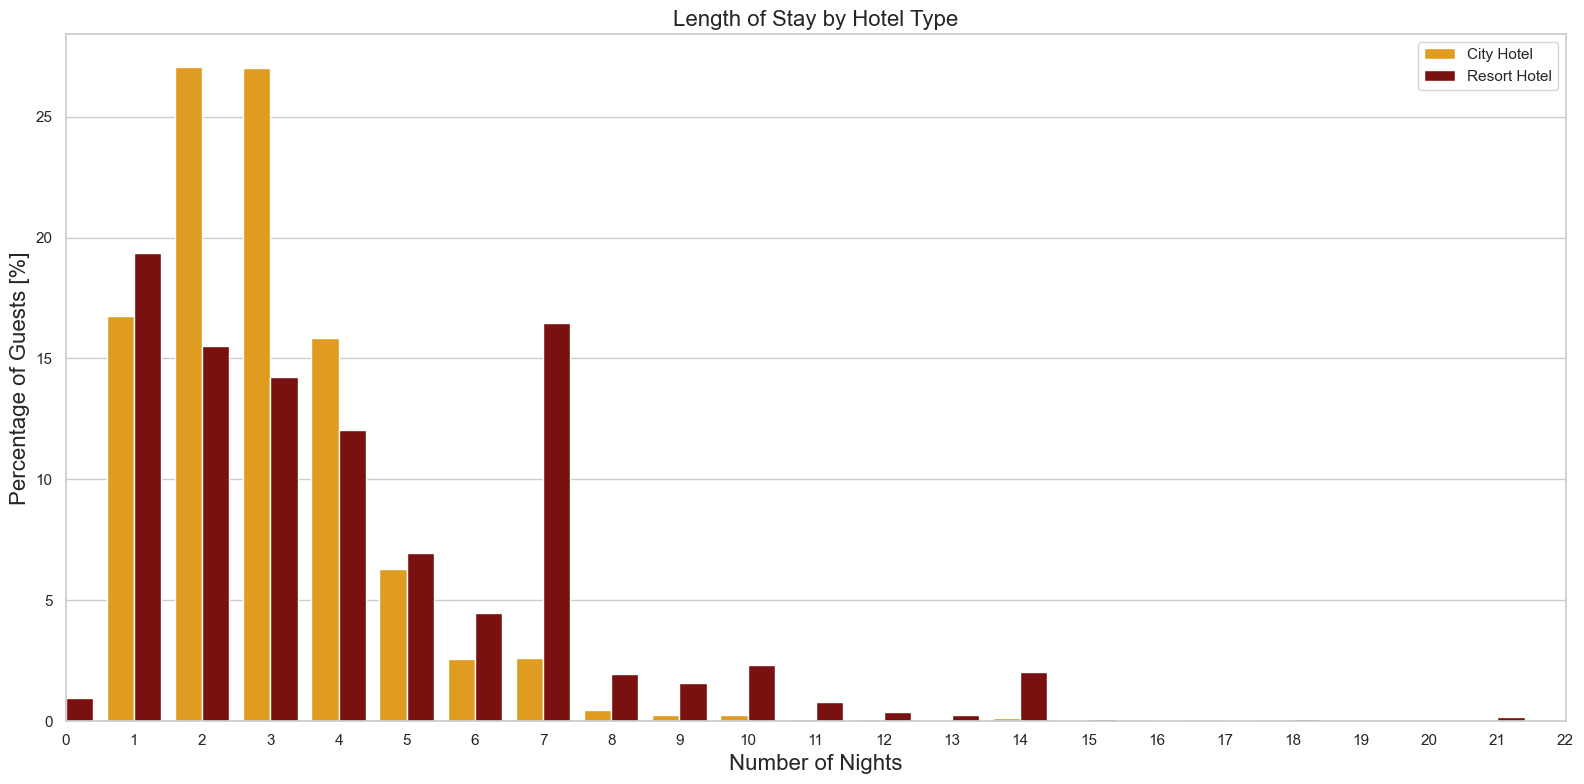

'year_count' successfully added.


/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/2939645823.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



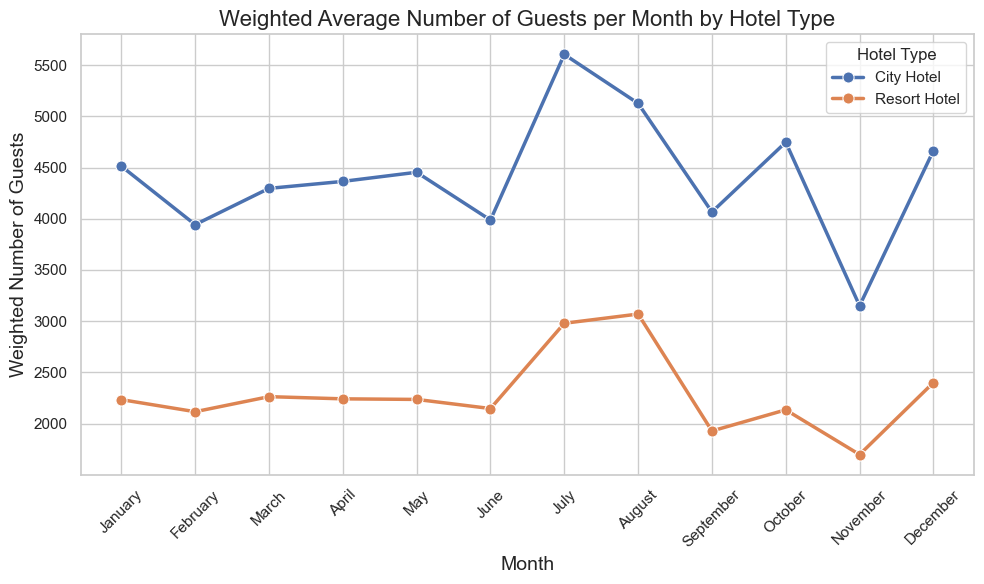

(119205, 40)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count_x',
       'year_month', 'differs_in_reserved_assigned', 'total_guests', 'adr_pp',
       'total_nights', 'year_count_y', 'year_count', 'weighted_guests'],
      dtype='object')
[3 2]


In [57]:
import plotly.express as px

### Graph 1: Length of stay by hotel type ###
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

stay_data = df.groupby(['hotel', 'total_nights']).size().reset_index(name='guest_count')
stay_data['guest_percentage'] = stay_data.groupby('hotel')['guest_count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(16, 8))
sns.barplot(x="total_nights", y="guest_percentage", hue="hotel", data=stay_data, 
            palette={"City Hotel": "orange", "Resort Hotel": "darkred"})

plt.title("Length of Stay by Hotel Type", fontsize=16)
plt.xlabel("Number of Nights", fontsize=16)
plt.ylabel("Percentage of Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0, 22)  
plt.tight_layout()
plt.show()

### Graph 2: Where do guests come from? ###
df['total_guests'] = df['adults'] + df['children']
df['total_guests'] = df['total_guests'].replace(0, 1)

country_guests = df.groupby('country')['total_guests'].sum().reset_index()

top_countries = country_guests.sort_values('total_guests', ascending=False).head(10)

fig = px.bar(top_countries,
             x='country',
             y='total_guests',
             title='Top 10 Countries by Number of Guests',
             labels={'total_guests': 'Number of Guests', 'country': 'Country'},
             template="seaborn",
             color='total_guests', 
             color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### Graph 3: Weighted guests by month and hotel type ###
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['arrival_date_month'] = df['reservation_status_date'].dt.strftime('%B')  # Full month name

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

years_per_month = df.groupby('arrival_date_month')['year'].nunique().reset_index()
years_per_month.columns = ['arrival_date_month', 'year_count']

df = df.merge(years_per_month, on='arrival_date_month', how='left')

if 'year_count' in df.columns:
    print("'year_count' successfully added.")
else:
    print("'year_count' column is missing.")

df['total_guests'] = df['adults'] + df['children']
df['total_guests'] = df['total_guests'].replace(0, 1)

df['weighted_guests'] = df['total_guests'] / df['year_count']

grouped_data = df.groupby(['arrival_date_month', 'hotel'], observed=True)['weighted_guests'].sum().reset_index()

if not grouped_data.empty:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='arrival_date_month', y='weighted_guests', hue='hotel', data=grouped_data, 
                 marker="o", markersize=8, hue_order=["City Hotel", "Resort Hotel"], linewidth=2.5)

    plt.title('Weighted Average Number of Guests per Month by Hotel Type', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Weighted Number of Guests', fontsize=14)
    plt.legend(title="Hotel Type", loc="upper right")
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")

### Graph 4: Bookings by market segment (including cancelled bookings)
segments=df["market_segment"].value_counts()

fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

print(df.shape)
print(df.columns)
print(df['year_count'].unique())


In [58]:
df = df.drop(columns=['year_count_x', 'year_count_y'], errors='ignore')
print(df.shape)
print(df.columns)

(119205, 38)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_month',
       'differs_in_reserved_assigned', 'total_guests', 'adr_pp',
       'total_nights', 'year_count', 'weighted_guests'],
      dtype='object')


In [59]:
### Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.feature_selection import f_classif, mutual_info_classif

# What features should we use?
df_copy = df.copy()
df_encoded = pd.get_dummies(df_copy, columns=['hotel', 'meal'], drop_first=True)
df_numeric = df_encoded.select_dtypes(include=[float, int])
correlation = df_numeric.corr()['is_canceled'].abs().sort_values(ascending=False)
print(correlation)
# But remember we only kept numerical features here

df.drop(columns=['year', 'year_count'], inplace=True) # No need in prediction

print(df.shape)
print(df.columns)


is_canceled                       1.000000
lead_time                         0.292937
differs_in_reserved_assigned      0.246750
total_of_special_requests         0.234931
required_car_parking_spaces       0.195698
booking_changes                   0.144808
year                              0.117053
previous_cancellations            0.110147
is_repeated_guest                 0.083715
weighted_guests                   0.064999
adults                            0.058157
previous_bookings_not_canceled    0.057355
year_count                        0.056752
days_in_waiting_list              0.054308
total_guests                      0.049879
adr                               0.046545
babies                            0.032567
stays_in_week_nights              0.025561
total_nights                      0.018579
adr_pp                            0.017858
arrival_date_year                 0.016702
arrival_date_week_number          0.008291
arrival_date_day_of_month         0.005910
children   

In [60]:
print(df["arrival_date_month"].unique())

['July', 'May', 'April', 'June', 'March', ..., 'January', 'November', 'October', 'December', 'February']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


In [61]:
### Preprocessing


# Feature definitions
num = ["lead_time", "arrival_date_week_number", "arrival_date_day_of_month",
       "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",
       "babies", "previous_cancellations",
       "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr",
       "required_car_parking_spaces", "total_of_special_requests", "total_guests", "total_nights"]

cat = ["hotel", "meal", "country", "market_segment", "distribution_channel",
       "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "is_repeated_guest", 
       "differs_in_reserved_assigned"]

ordinal_features = ["arrival_date_month"]

# Combine all features
features = num + cat + ordinal_features

# Extract features and target variable
X = df.drop(columns=["is_canceled", "reservation_status", "reservation_status_date", 
                     "year_month", "adr_pp", "weighted_guests", "arrival_date_year"])[features]
y = df["is_canceled"]

# Train-test split
random_state = 42
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=random_state)

# Define month order for OrdinalEncoder
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Impute missing values in categorical columns
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # OneHotEncoder after imputing missing values
        ]), cat),
        ('std', StandardScaler(), num),  # StandardScaler for numerical features
        ('ordinal', Pipeline(steps=[
            ('ordinal', OrdinalEncoder(categories=[month_order]))  # OrdinalEncoder for arrival_date_month
        ]), ordinal_features)
    ]
)

# Create full pipeline and preprocess data
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = pipeline.fit_transform(X_train)
X_val_prep = pipeline.transform(X_val)
X_test_prep = pipeline.transform(X_test)

# Verify preprocessing
print("Original training set shape:", X_train.shape)
print("Preprocessed training set shape:", X_train_prep.shape)
print("First 5 rows of preprocessed training set:")
print(X_train_prep[:5])

print(df.shape)
print(df.columns)

Original training set shape: (71523, 29)
Preprocessed training set shape: (71523, 231)
First 5 rows of preprocessed training set:
[[ 1.          0.          0.         ... -1.33520413 -0.55758724
   2.        ]
 [ 0.          1.          1.         ...  0.04980559 -0.94761474
   2.        ]
 [ 1.          0.          1.         ... -1.33520413 -0.55758724
   8.        ]
 [ 0.          1.          1.         ... -1.33520413  1.39255027
   2.        ]
 [ 1.          0.          1.         ...  0.04980559 -0.94761474
   6.        ]]
(119205, 36)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_r

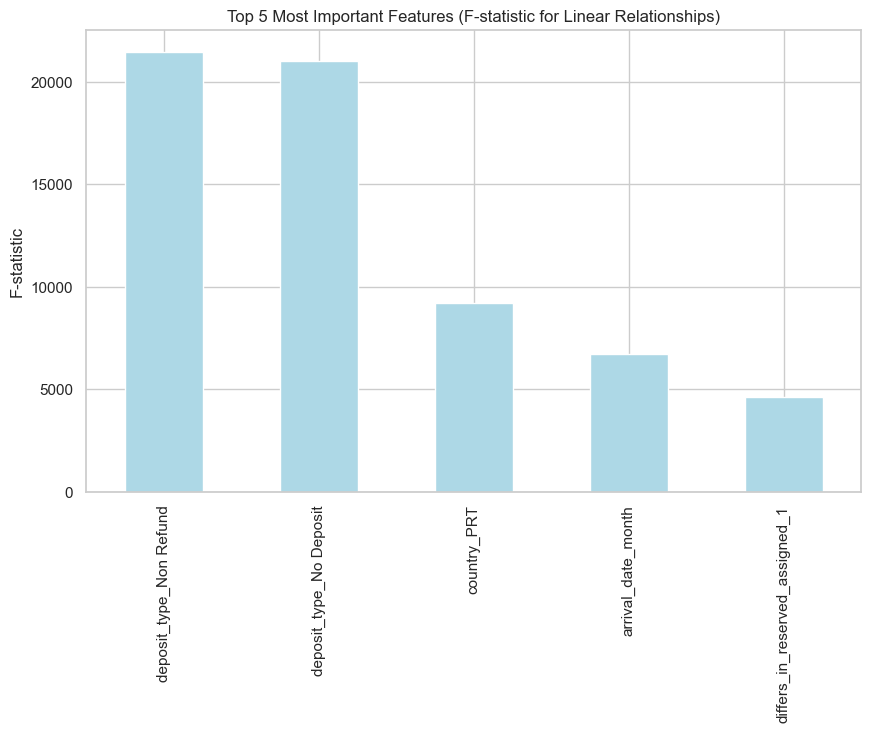

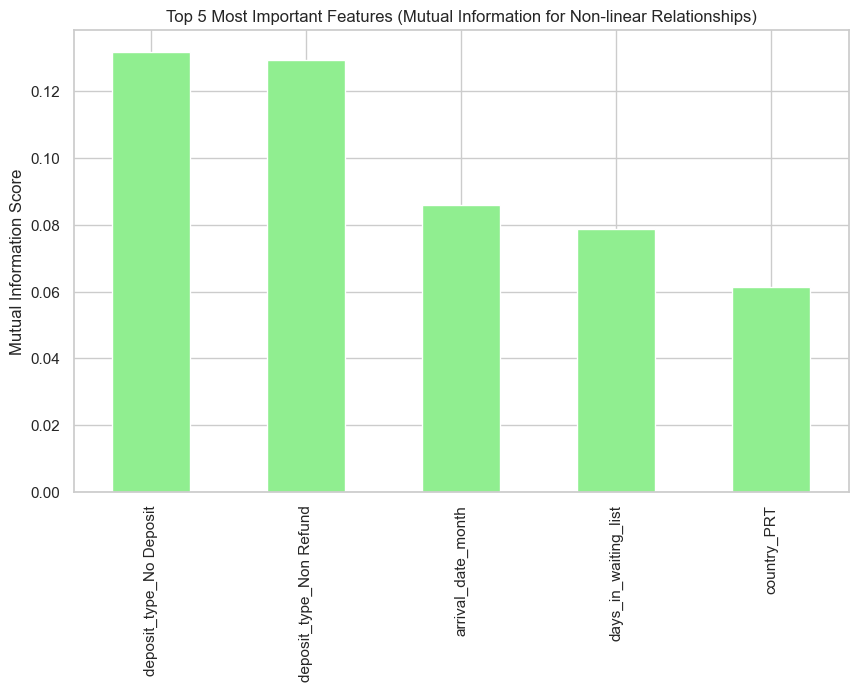

Top 5 features by F-statistic (linear):
 deposit_type_Non Refund           21469.577319
deposit_type_No Deposit           21031.174816
country_PRT                        9229.666919
arrival_date_month                 6703.432527
differs_in_reserved_assigned_1     4619.320828
dtype: float64

Top 5 features by Mutual Information (non-linear):
 deposit_type_No Deposit    0.131830
deposit_type_Non Refund    0.129399
arrival_date_month         0.085853
days_in_waiting_list       0.078797
country_PRT                0.061528
dtype: float64


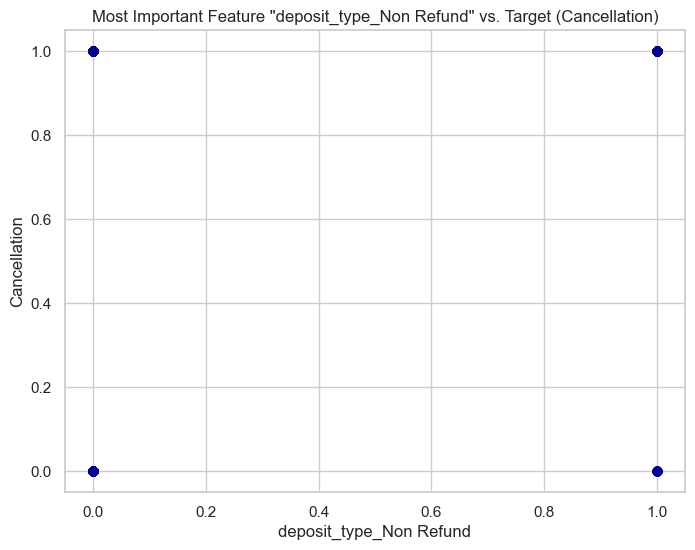

(119205, 36)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year_month',
       'differs_in_reserved_assigned', 'total_guests', 'adr_pp',
       'total_nights', 'weighted_guests'],
      dtype='object')


In [62]:
# After the pipeline fit, get the feature names from onehot, ordinal, and numerical features
onehot_feature_names = preprocessor.named_transformers_['onehot']['onehot'].get_feature_names_out(cat)
ordinal_feature_names = ordinal_features  # Ordinal features retain their original names
final_feature_names = list(onehot_feature_names) + ordinal_feature_names + num

# f_classif (for linear relationships)
f_statistic, p_values = f_classif(X_train_prep, y_train)
f_stat_series = pd.Series(f_statistic, index=final_feature_names).sort_values(ascending=False)

# mutual_info_classif (for non-linear relationships)
mi_classif = mutual_info_classif(X_train_prep, y_train, random_state=42)
mi_classif_series = pd.Series(mi_classif, index=final_feature_names).sort_values(ascending=False)

# Visualize F-statistic for top 5 features
plt.figure(figsize=(10, 6))
f_stat_series.head(5).plot(kind='bar', color='lightblue')
plt.title('Top 5 Most Important Features (F-statistic for Linear Relationships)')
plt.ylabel('F-statistic')
plt.show()

# Visualize Mutual Information for top 5 features
plt.figure(figsize=(10, 6))
mi_classif_series.head(5).plot(kind='bar', color='lightgreen')
plt.title('Top 5 Most Important Features (Mutual Information for Non-linear Relationships)')
plt.ylabel('Mutual Information Score')
plt.show()

print("Top 5 features by F-statistic (linear):\n", f_stat_series.head(5))
print("\nTop 5 features by Mutual Information (non-linear):\n", mi_classif_series.head(5))

most_important_feature = f_stat_series.index[0]  # Get the name of the most important feature
most_important_feature_idx = final_feature_names.index(most_important_feature)  # Get the index of the most important feature

plt.figure(figsize=(8, 6))
plt.scatter(X_train_prep[:, most_important_feature_idx], y_train, color='darkblue')
plt.title(f'Most Important Feature "{most_important_feature}" vs. Target (Cancellation)')
plt.xlabel(most_important_feature)
plt.ylabel('Cancellation')
plt.show()

print(df.shape)
print(df.columns)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, ParameterGrid
import numpy as np
import pandas as pd

# Parameters to tune and values
print("Tuned Parameters and Values:")
lr_param_grid = {
    "penalty": ["l1", "l2"],          # Type of regularization: L1 or L2
    "C": [0.1, 1, 10],               # Regularization strength
    "solver": ["liblinear"],         # Use liblinear solver for faster convergence
}
print(lr_param_grid)

# Random states for uncertainty analysis
random_states = [0, 1, 2, 3, 4]
best_models = []
results = []

for random_state in random_states:
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )
    
    # Apply preprocessing
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)
    
    # Further split train data into sub-train and validation sets
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train_transformed, y_train, test_size=0.2, random_state=random_state, stratify=y_train
    )
    
    # Grid search for hyperparameter tuning
    best_model = None
    best_val_score = 0
    best_params = None
    
    for params in ParameterGrid(lr_param_grid):
        model = LogisticRegression(
            max_iter=1000000,  # Increased max_iter to eliminate convergence warnings
            random_state=random_state,
            n_jobs=1,  # Removed parallel jobs warning (liblinear does not support it)
            **params
        )
        model.fit(X_train_sub, y_train_sub)
        
        # Evaluate on validation set
        y_val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        
        if val_accuracy > best_val_score:
            best_model = model
            best_val_score = val_accuracy
            best_params = params

    # Store the best model for the current split
    best_models.append(best_model)
    
    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test_transformed)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Store results
    results.append({
        "Random State": random_state,
        "Best Parameters": best_params,
        "Validation Accuracy": best_val_score,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1
    })

    print(f"\nRandom State {random_state}")
    print(f"Best Parameters: {best_params}")
    print(f"Validation Metrics: Accuracy={best_val_score:.4f}")
    print(f"Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\n### Logistic Regression Metrics Across Random States ###")
print(results_df)

best_params_overall = results_df.loc[results_df["Validation Accuracy"].idxmax(), "Best Parameters"]
print(f"\nOverall Best Hyperparameters: {best_params_overall}")

# Compute averages and standard deviations
summary = results_df[["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]].agg(["mean", "std"])
print("\n### Summary of Test Metrics (Mean and Std Dev) ###")
print(summary)

results_df.to_csv("logistic_regression_results.csv", index=False)

Tuned Parameters and Values:
{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']}

Random State 0
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Metrics: Accuracy=0.8271
Test Metrics: Accuracy=0.8257, Precision=0.8241, Recall=0.6737, F1=0.7414

Random State 1
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Metrics: Accuracy=0.8294
Test Metrics: Accuracy=0.8263, Precision=0.8197, Recall=0.6813, F1=0.7441

Random State 2
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Metrics: Accuracy=0.8251
Test Metrics: Accuracy=0.8292, Precision=0.8212, Recall=0.6894, F1=0.7496

Random State 3
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Metrics: Accuracy=0.8269
Test Metrics: Accuracy=0.8280, Precision=0.8280, Recall=0.6767, F1=0.7447

Random State 4
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Metrics: Accuracy=0.8253
Test Metri

In [64]:
### KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, ParameterGrid
import numpy as np
import pandas as pd

# Parameters to tune and values
print("Tuned Parameters and Values:")
knn_param_grid = {
    "n_neighbors": [3, 5, 10],       # Number of neighbors to use
    "weights": ["uniform", "distance"],  # Uniform or distance-based weighting
    "metric": ["minkowski"]          # Distance metric (default: Minkowski)
}
print(knn_param_grid)

random_states = [0, 1, 2, 3, 4]  # Random splits to measure uncertainties
best_models = []
results = []

for random_state in random_states:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )
    
    # Use preprocessed data
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)
    
    # Split training data into sub-train and validation sets
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train_transformed, y_train, test_size=0.2, random_state=random_state, stratify=y_train
    )
    
    # Grid search for hyperparameter tuning
    best_model = None
    best_val_score = 0
    best_params = None
    
    for params in ParameterGrid(knn_param_grid):
        model = KNeighborsClassifier(**params)
        model.fit(X_train_sub, y_train_sub)
        
        # Evaluate on validation set
        y_val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred)
        val_recall = recall_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)
        
        if val_accuracy > best_val_score:
            best_model = model
            best_val_score = val_accuracy
            best_params = params

    # Store the best model for the current split
    best_models.append(best_model)
    
    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test_transformed)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Save all results
    results.append({
        "Random State": random_state,
        "Best Parameters": best_params,
        "Validation Accuracy": best_val_score,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1
    })

    print(f"\nRandom State {random_state}")
    print(f"Best Parameters: {best_params}")
    print(f"Validation Metrics: Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}")
    print(f"Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("\n### KNeighborsClassifier Metrics Across Random States ###")
print(results_df)

# Compute averages and standard deviations
summary = results_df[["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]].agg(["mean", "std"])
print("\n### Summary of Test Metrics (Mean and Std Dev) ###")
print(summary)

best_params_overall = results_df.loc[results_df["Validation Accuracy"].idxmax(), "Best Parameters"]
print(f"\nOverall Best Hyperparameters: {best_params_overall}")

results_df.to_csv("kneighbors_results.csv", index=False)


Tuned Parameters and Values:
{'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance'], 'metric': ['minkowski']}

Random State 0
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Validation Metrics: Accuracy=0.8949, Precision=0.9027, Recall=0.8030, F1=0.8499
Test Metrics: Accuracy=0.8940, Precision=0.9055, Recall=0.7975, F1=0.8481

Random State 1
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Validation Metrics: Accuracy=0.8940, Precision=0.8937, Recall=0.8105, F1=0.8500
Test Metrics: Accuracy=0.8955, Precision=0.9027, Recall=0.8048, F1=0.8510

Random State 2
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Validation Metrics: Accuracy=0.8936, Precision=0.9019, Recall=0.7999, F1=0.8478
Test Metrics: Accuracy=0.8958, Precision=0.9002, Recall=0.8085, F1=0.8519

Random State 3
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Validation Metrics: Accu

In [65]:
### RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, ParameterGrid
import numpy as np
import pandas as pd

# Parameters to tune and values
print("Tuned Parameters and Values:")
rf_param_grid = {
    "max_depth": [5, 10, 50, None],            # Maximum depth of the tree (expanded range)
    "min_samples_split": [2, 5, 10, 50],      # Minimum samples required to split a node (expanded range)
    "min_samples_leaf": [1, 2, 4, 10]         # Minimum samples required at each leaf node (expanded range)
}
print(rf_param_grid)

# Variables to store results
random_states = [0, 1, 2, 3, 4]  # Random splits to measure uncertainties
best_models = []
results = []

for random_state in random_states:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )
    
    # Use preprocessed data
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)
    
    # Split training data into sub-train and validation sets
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train_transformed, y_train, test_size=0.2, random_state=random_state, stratify=y_train
    )
    
    # Grid search for hyperparameter tuning
    best_model = None
    best_val_score = 0
    best_params = None
    
    for params in ParameterGrid(rf_param_grid):
        model = RandomForestClassifier(random_state=random_state, n_estimators=100, **params)  # Fixed n_estimators
        model.fit(X_train_sub, y_train_sub)
        
        # Evaluate on validation set
        y_val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred)
        val_recall = recall_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)
        
        if val_accuracy > best_val_score:
            best_model = model
            best_val_score = val_accuracy
            best_params = params

    # Store the best model for the current split
    best_models.append(best_model)
    
    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test_transformed)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    results.append({
        "Random State": random_state,
        "Best Parameters": best_params,
        "Validation Accuracy": best_val_score,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1
    })

    print(f"\nRandom State {random_state}")
    print(f"Best Parameters: {best_params}")
    print(f"Validation Metrics: Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}")
    print(f"Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}")

# Store results in a DataFrame
results_df = pd.DataFrame(results)

print("\n### Random Forest Metrics Across Random States ###")
print(results_df)

# Compute averages and uncertainties
summary = results_df[["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]].agg(["mean", "std"])
print("\n### Summary of Test Metrics (Mean and Std Dev) ###")
print(summary)

# Highlight best hyperparameters
best_params_overall = results_df.loc[results_df["Validation Accuracy"].idxmax(), "Best Parameters"]
print(f"\nOverall Best Hyperparameters: {best_params_overall}")

results_df.to_csv("random_forest_results.csv", index=False)


Tuned Parameters and Values:
{'max_depth': [5, 10, 50, None], 'min_samples_split': [2, 5, 10, 50], 'min_samples_leaf': [1, 2, 4, 10]}

Random State 0
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Validation Metrics: Accuracy=0.8721, Precision=0.9248, Recall=0.7131, F1=0.8052
Test Metrics: Accuracy=0.9155, Precision=0.9400, Recall=0.8248, F1=0.8786

Random State 1
Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Metrics: Accuracy=0.8785, Precision=0.9179, Recall=0.7384, F1=0.8184
Test Metrics: Accuracy=0.9170, Precision=0.9361, Recall=0.8331, F1=0.8816

Random State 2
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Validation Metrics: Accuracy=0.8718, Precision=0.9166, Recall=0.7197, F1=0.8063
Test Metrics: Accuracy=0.9177, Precision=0.9363, Recall=0.8349, F1=0.8827

Random State 3
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Valida

In [ ]:
### SVC - Took Too Long...


#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.model_selection import train_test_split, ParameterGrid
#import numpy as np
#import pandas as pd

# Parameters to tune and values
#print("Tuned Parameters and Values:")
#svm_param_grid = {
    #"C": [0.1, 1, 10],           # Regularization parameter
    #"gamma": [0.001, 0.01, 0.1], # Kernel coefficient
    #"kernel": ["rbf"]            # RBF kernel
#}
#print(svm_param_grid)

#Variables to store results
#random_states = [0, 1, 2, 3, 4]  # Random splits to measure uncertainties
#best_models = []
#results = []

#for random_state in random_states:
    #Train-test split
    #X_train, X_test, y_train, y_test = train_test_split(
        #X, y, test_size=0.2, random_state=random_state, stratify=y
    #)
    
    #Use preprocessed data
    #X_train_transformed = pipeline.transform(X_train)
    #X_test_transformed = pipeline.transform(X_test)
    
    #Split training data into sub-train and validation sets
    #X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        #X_train_transformed, y_train, test_size=0.2, random_state=random_state, stratify=y_train
    #)
    
    #Grid search for hyperparameter tuning
    #best_model = None
    #best_val_score = 0
    #best_params = None
    
    #for params in ParameterGrid(svm_param_grid):
        #model = SVC(probability=True, **params)
        #model.fit(X_train_sub, y_train_sub)
        
        # Evaluate on validation set
        #y_val_pred = model.predict(X_val)
        #val_accuracy = accuracy_score(y_val, y_val_pred)
        #val_precision = precision_score(y_val, y_val_pred)
        #val_f1 = f1_score(y_val, y_val_pred)
        
        #if val_accuracy > best_val_score:
            #best_model = model
            #best_val_score = val_accuracy
            #best_params = params

    # Store the best model for the current split
    #best_models.append(best_model)
    
    # Evaluate the best model on the test set
    #y_test_pred = best_model.predict(X_test_transformed)
    #test_accuracy = accuracy_score(y_test, y_test_pred)
    #test_precision = precision_score(y_test, y_test_pred)
    #test_recall = recall_score(y_test, y_test_pred)
    #test_f1 = f1_score(y_test, y_test_pred)

    #results.append({
        #"Random State": random_state,
        #"Best Parameters": best_params,
        #"Validation Accuracy": val_accuracy,
        #"Validation Recall": val_recall,
        #"Validation F1": val_f1,
        #"Test Accuracy": test_accuracy,
        #"Test Precision": test_precision,
        #"Test Recall": test_recall,
        #"Test F1": test_f1
    #})

    #print(f"\nRandom State {random_state}")
    #print(f"Best Parameters: {best_params}")
    #print(f"Validation Metrics: Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}")
    #print(f"Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}")

# Convert results to DataFrame
#results_df = pd.DataFrame(results)

#print("\n### SVM Metrics Across Random States ###")
#print(results_df)

# Compute averages and uncertainties
#summary = results_df[["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]].agg(["mean", "std"])
#print("\n### Summary of Test Metrics (Mean and Std Dev) ###")
#print(summary)

#results_df.to_csv("svm_results.csv", index=False)


Tuned Parameters and Values:
{'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}


Tuned Parameters and Values:
{'max_depth': [3, 5, 10, 20], 'n_estimators': [50, 100, 500, 1000], 'subsample': [0.5, 0.8, 1.0], 'colsample_bytree': [0.5, 0.8, 1.0], 'eval_metric': ['logloss'], 'objective': ['binary:logistic']}


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:40:02] WARNING: /Users/runner/work/xgbo


Random State 0
Best Parameters: {'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'max_depth': 10, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1.0}
Validation Metrics: Accuracy=0.9505, Precision=0.9679, Recall=0.8961, F1=0.9306
Test Metrics: Accuracy=0.9527, Precision=0.9710, Recall=0.8993, F1=0.9338


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:48:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:48:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:48:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:48:34] WARNING: /Users/runner/work/xgbo


Random State 1
Best Parameters: {'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'max_depth': 10, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1.0}
Validation Metrics: Accuracy=0.9518, Precision=0.9635, Recall=0.9043, F1=0.9330
Test Metrics: Accuracy=0.9504, Precision=0.9663, Recall=0.8976, F1=0.9307


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:57:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:57:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:57:31] WARNING: /Users/runner/work/xgbo


Random State 2
Best Parameters: {'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'max_depth': 10, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1.0}
Validation Metrics: Accuracy=0.9483, Precision=0.9597, Recall=0.8983, F1=0.9280
Test Metrics: Accuracy=0.9532, Precision=0.9672, Recall=0.9044, F1=0.9348


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:05:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:05:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:05:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:05:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:05:56] WARNING: /Users/runner/work/xgbo


Random State 3
Best Parameters: {'colsample_bytree': 0.5, 'eval_metric': 'logloss', 'max_depth': 10, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1.0}
Validation Metrics: Accuracy=0.9496, Precision=0.9605, Recall=0.9010, F1=0.9298
Test Metrics: Accuracy=0.9541, Precision=0.9670, Recall=0.9071, F1=0.9361


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:14:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:14:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:14:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:15:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:15:11] WARNING: /Users/runner/work/xgbo


Random State 4
Best Parameters: {'colsample_bytree': 0.5, 'eval_metric': 'logloss', 'max_depth': 10, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1.0}
Validation Metrics: Accuracy=0.9526, Precision=0.9654, Recall=0.9045, F1=0.9340
Test Metrics: Accuracy=0.9518, Precision=0.9689, Recall=0.8990, F1=0.9326

### XGBoost Metrics Across Random States ###
   Random State                                    Best Parameters  \
0             0  {'colsample_bytree': 1.0, 'eval_metric': 'logl...   
1             1  {'colsample_bytree': 1.0, 'eval_metric': 'logl...   
2             2  {'colsample_bytree': 1.0, 'eval_metric': 'logl...   
3             3  {'colsample_bytree': 0.5, 'eval_metric': 'logl...   
4             4  {'colsample_bytree': 0.5, 'eval_metric': 'logl...   

   Validation Accuracy  Validation Precision  Validation Recall  \
0             0.950454              0.967919           0.896054   
1             0.951817              0.963532           0.904257   
2     

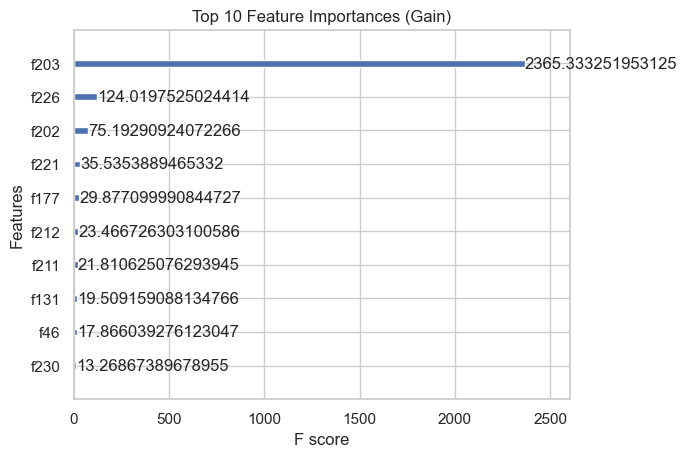

In [66]:
### XGBoost

import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, ParameterGrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters to tune
print("Tuned Parameters and Values:")
xgb_param_grid = {
    "max_depth": [3, 5, 10, 20],                # Maximum depth of a tree (expanded range)
    "n_estimators": [50, 100, 500, 1000],       # Number of boosting rounds
    "subsample": [0.5, 0.8, 1.0],               # Fraction of samples used for training each tree
    "colsample_bytree": [0.5, 0.8, 1.0],        # Fraction of features used for training each tree
    "eval_metric": ["logloss"],                 # Metric to evaluate during training
    "objective": ["binary:logistic"]            # Objective function for binary classification
}
print(xgb_param_grid)

# Initialize variables to store results
random_states = [0, 1, 2, 3, 4]  # Random splits to measure uncertainties
best_models = []
results = []

for random_state in random_states:
    # Train-test split for the current random state
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )
    
    # Use already-run preprocessing
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)
    
    # Split training data into sub-train and validation sets
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train_transformed, y_train, test_size=0.2, random_state=random_state, stratify=y_train
    )
    
    # Convert to DMatrix format
    dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test_transformed, label=y_test)

    # Grid search for hyperparameter tuning
    best_model = None
    best_val_score = 0
    best_params = None
    
    for params in ParameterGrid(xgb_param_grid):
        evals = [(dtrain, "train"), (dval, "eval")]
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=5000,
            evals=evals,
            early_stopping_rounds=50,  # Early stopping to avoid overfitting
            verbose_eval=False
        )
        
        # Evaluate on validation set
        y_val_pred = model.predict(dval)
        y_val_pred_binary = (y_val_pred > 0.5).astype(int)
        val_accuracy = accuracy_score(y_val, y_val_pred_binary)
        val_precision = precision_score(y_val, y_val_pred_binary)
        val_recall = recall_score(y_val, y_val_pred_binary)
        val_f1 = f1_score(y_val, y_val_pred_binary)
        
        if val_accuracy > best_val_score:
            best_model = model
            best_val_score = val_accuracy
            best_params = params

    # Store the best model and parameters for the current split
    best_models.append(best_model)
    
    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(dtest)
    y_test_pred_binary = (y_test_pred > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_test_pred_binary)
    test_precision = precision_score(y_test, y_test_pred_binary)
    test_recall = recall_score(y_test, y_test_pred_binary)
    test_f1 = f1_score(y_test, y_test_pred_binary)

    # Save all results
    results.append({
        "Random State": random_state,
        "Best Parameters": best_params,
        "Validation Accuracy": val_accuracy,
        "Validation Precision": val_precision,
        "Validation Recall": val_recall,
        "Validation F1": val_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1
    })

    print(f"\nRandom State {random_state}")
    print(f"Best Parameters: {best_params}")
    print(f"Validation Metrics: Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1={val_f1:.4f}")
    print(f"Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}")

# Store results in a DataFrame
results_df = pd.DataFrame(results)

print("\n### XGBoost Metrics Across Random States ###")
print(results_df)

# Compute averages and uncertainties
summary = results_df[["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]].agg(["mean", "std"])
print("\n### Summary of Test Metrics (Mean and Std Dev) ###")
print(summary)

# Highlight best hyperparameters
best_params_overall = results_df.loc[results_df["Validation Accuracy"].idxmax(), "Best Parameters"]
print(f"\nOverall Best Hyperparameters: {best_params_overall}")

results_df.to_csv("xgboost_results.csv", index=False)

xgb.plot_importance(best_models[-1], max_num_features=10, importance_type="gain")
plt.title("Top 10 Feature Importances (Gain)")
plt.show()


In [67]:
import pandas as pd

results = pd.read_csv("/Users/zixili/Desktop/Brown/Fall 2024/DATA1030-Fall2024/final reports/logistic_regression_results.csv")

# Identify the best model index based on Validation Accuracy
best_model_index = results['Validation Accuracy'].idxmax()

# Select the best model from your saved best_models list
logistic_regression_best_model = best_models[best_model_index]

print("\n### Selected Best Logistic Regression Model ###")
print(f"Random State: {results.loc[best_model_index, 'Random State']}")
print(f"Best Parameters: {results.loc[best_model_index, 'Best Parameters']}")
print(f"Validation Accuracy: {results.loc[best_model_index, 'Validation Accuracy']}")
print(f"Test Accuracy: {results.loc[best_model_index, 'Test Accuracy']}")
print(f"Test Precision: {results.loc[best_model_index, 'Test Precision']}")
print(f"Test Recall: {results.loc[best_model_index, 'Test Recall']}")
print(f"Test F1: {results.loc[best_model_index, 'Test F1']}")


### Selected Best Logistic Regression Model ###
Random State: 1
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy: 0.8293923347139937
Test Accuracy: 0.826265676775303
Test Precision: 0.8196542806587723
Test Recall: 0.6812987894558208
Test F1: 0.7440998393673545


In [68]:
import pandas as pd

kneighbors_results = pd.read_csv("/Users/zixili/Desktop/Brown/Fall 2024/DATA1030-Fall2024/final reports/kneighbors_results.csv")

# Identify the best model index based on Validation Accuracy
kneighbors_best_index = kneighbors_results['Validation Accuracy'].idxmax()

# Select the best model from your saved best_models list for KNeighbors
kneighbors_best_model = best_models[kneighbors_best_index]  # Replace `best_models` with your KNeighbors models list

print("\n### Selected Best KNeighbors Model ###")
print(f"Random State: {kneighbors_results.loc[kneighbors_best_index, 'Random State']}")
print(f"Best Parameters: {kneighbors_results.loc[kneighbors_best_index, 'Best Parameters']}")
print(f"Validation Accuracy: {kneighbors_results.loc[kneighbors_best_index, 'Validation Accuracy']}")
print(f"Test Accuracy: {kneighbors_results.loc[kneighbors_best_index, 'Test Accuracy']}")
print(f"Test Precision: {kneighbors_results.loc[kneighbors_best_index, 'Test Precision']}")
print(f"Test Recall: {kneighbors_results.loc[kneighbors_best_index, 'Test Recall']}")
print(f"Test F1: {kneighbors_results.loc[kneighbors_best_index, 'Test F1']}")



### Selected Best KNeighbors Model ###
Random State: 0
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Validation Accuracy: 0.8948775756304724
Test Accuracy: 0.8940480684535045
Test Precision: 0.9054592164418754
Test Recall: 0.797488403665573
Test F1: 0.848051010587103


In [69]:
import pandas as pd

rf_results = pd.read_csv("/Users/zixili/Desktop/Brown/Fall 2024/DATA1030-Fall2024/final reports/random_forest_results.csv")

# Identify the best model index based on Validation Accuracy
rf_best_index = rf_results['Validation Accuracy'].idxmax()

# Select the best model from your saved best_models list for Random Forest
rf_best_model = best_models[rf_best_index]  # Replace `best_models` with your Random Forest models list

print("\n### Selected Best Random Forest Model ###")
print(f"Random State: {rf_results.loc[rf_best_index, 'Random State']}")
print(f"Best Parameters: {rf_results.loc[rf_best_index, 'Best Parameters']}")
print(f"Validation Accuracy: {rf_results.loc[rf_best_index, 'Validation Accuracy']}")
print(f"Test Accuracy: {rf_results.loc[rf_best_index, 'Test Accuracy']}")
print(f"Test Precision: {rf_results.loc[rf_best_index, 'Test Precision']}")
print(f"Test Recall: {rf_results.loc[rf_best_index, 'Test Recall']}")
print(f"Test F1: {rf_results.loc[rf_best_index, 'Test F1']}")



### Selected Best Random Forest Model ###
Random State: 1
Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Accuracy: 0.9221412467886542
Test Accuracy: 0.9170336814730926
Test Precision: 0.9360620312698614
Test Recall: 0.8331259192216314
Test F1: 0.8815994253561594


In [70]:
import pandas as pd

xgb_results = pd.read_csv("/Users/zixili/Desktop/Brown/Fall 2024/DATA1030-Fall2024/final reports/xgboost_results.csv")

# Identify the best model index based on Validation Accuracy
xgb_best_index = xgb_results['Validation Accuracy'].idxmax()

# Select the best model from your saved best_models list for XGBoost
xgb_best_model = best_models[xgb_best_index]  # Replace `best_models` with your XGBoost models list

print("\n### Selected Best XGBoost Model ###")
print(f"Random State: {xgb_results.loc[xgb_best_index, 'Random State']}")
print(f"Best Parameters: {xgb_results.loc[xgb_best_index, 'Best Parameters']}")
print(f"Validation Accuracy: {xgb_results.loc[xgb_best_index, 'Validation Accuracy']}")
print(f"Test Accuracy: {xgb_results.loc[xgb_best_index, 'Test Accuracy']}")
print(f"Test Precision: {xgb_results.loc[xgb_best_index, 'Test Precision']}")
print(f"Test Recall: {xgb_results.loc[xgb_best_index, 'Test Recall']}")
print(f"Test F1: {xgb_results.loc[xgb_best_index, 'Test F1']}")



### Selected Best XGBoost Model ###
Random State: 4
Best Parameters: {'colsample_bytree': 0.5, 'eval_metric': 'logloss', 'max_depth': 10, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1.0}
Validation Accuracy: 0.952603156294238
Test Accuracy: 0.9518476573969212
Test Precision: 0.9689062309474454
Test Recall: 0.898970471772825
Test F1: 0.9326291079812208


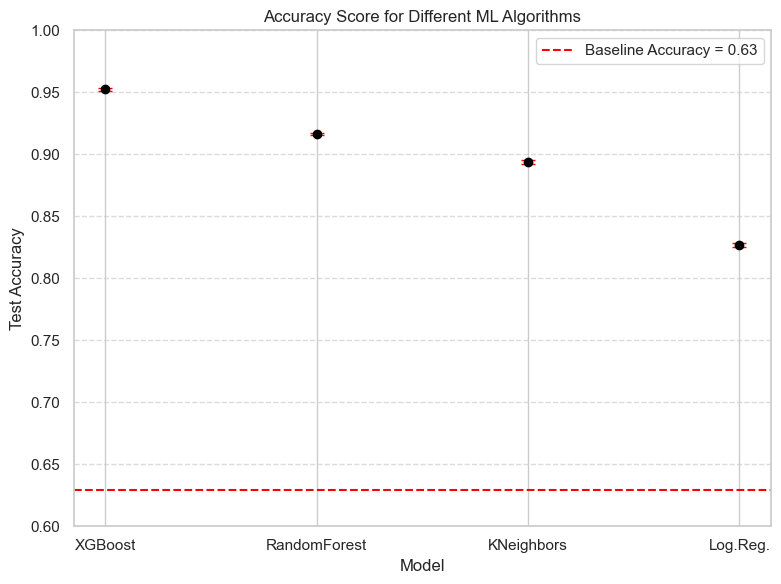

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Input results data
results_data = {
    "Model": ["XGBoost", "RandomForest", "KNeighbors", "Log.Reg."],
    "Test Mean Accuracy": [0.952452, 0.916530, 0.894166, 0.826786],  
    "Test StdDev Accuracy": [0.001390, 0.001025, 0.001678, 0.001808]  
}
results_df = pd.DataFrame(results_data)

plt.figure(figsize=(8, 6))
plt.errorbar(
    x=results_df["Model"],
    y=results_df["Test Mean Accuracy"],
    yerr=results_df["Test StdDev Accuracy"],
    fmt='o', 
    color='black',
    ecolor='red',  
    elinewidth=2,
    capsize=5,  
)

# Baseline accuracy 
baseline_accuracy = 0.6293
plt.axhline(y=baseline_accuracy, color='red', linestyle='--', label=f'Baseline Accuracy = {baseline_accuracy:.2f}')

plt.title("Accuracy Score for Different ML Algorithms")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.6, 1)  # Set y-axis limits
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("accuracy_scores_highres.png", dpi=300)  # Save the figure at 300 DPI
plt.show()


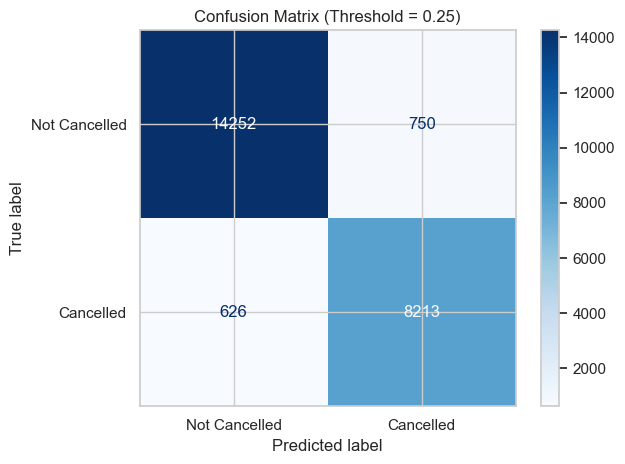

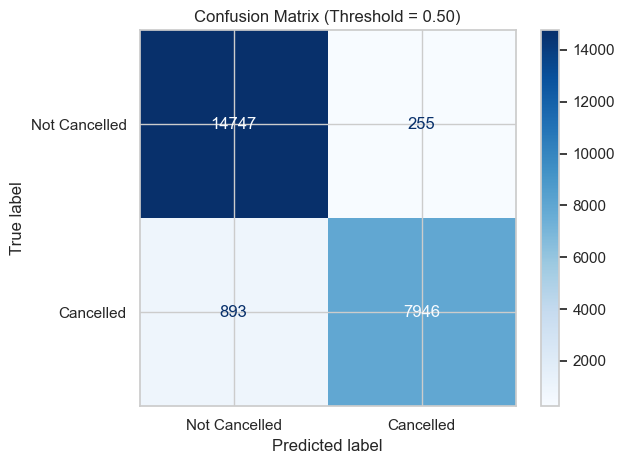

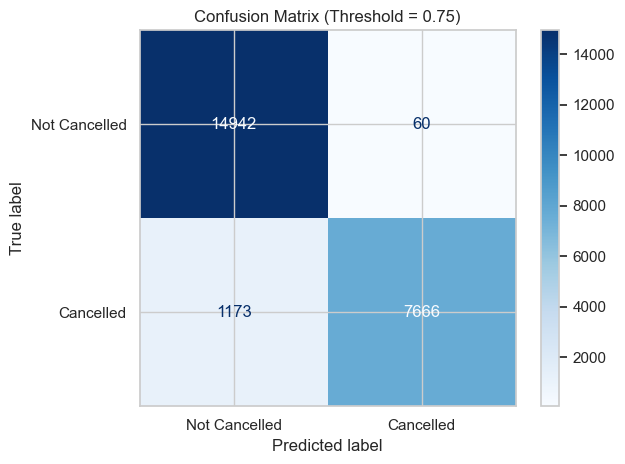

In [72]:
### Confusion matrices for XGBoost

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate prediction probabilities for the positive class
y_pred_probs = best_model.predict(xgb.DMatrix(X_test_transformed))

def plot_confusion_matrix(y_true, y_pred, threshold):
    """
    Plot and save a confusion matrix for a specific threshold.
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Cancelled', 'Cancelled'])
    
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Threshold = {threshold:.2f})')
    plt.tight_layout()
    
    plt.savefig(f"confusion_matrix_threshold_{threshold:.2f}.png", dpi=300)
    plt.show()

# Define thresholds to evaluate
thresholds = [0.25, 0.50, 0.75]

for threshold in thresholds:
    y_pred = (y_pred_probs >= threshold).astype(int)
    plot_confusion_matrix(y_test, y_pred, threshold)
    

Baseline Test Score: 0.9518
Shuffling onehot__hotel_City Hotel
Shuffling onehot__hotel_Resort Hotel
Shuffling onehot__meal_BB
Shuffling onehot__meal_FB
Shuffling onehot__meal_HB
Shuffling onehot__meal_SC
Shuffling onehot__country_ABW
Shuffling onehot__country_AGO
Shuffling onehot__country_ALB
Shuffling onehot__country_AND
Shuffling onehot__country_ARE
Shuffling onehot__country_ARG
Shuffling onehot__country_ARM
Shuffling onehot__country_ASM
Shuffling onehot__country_ATA
Shuffling onehot__country_AUS
Shuffling onehot__country_AUT
Shuffling onehot__country_AZE
Shuffling onehot__country_BDI
Shuffling onehot__country_BEL
Shuffling onehot__country_BEN
Shuffling onehot__country_BFA
Shuffling onehot__country_BGD
Shuffling onehot__country_BGR
Shuffling onehot__country_BHR
Shuffling onehot__country_BIH
Shuffling onehot__country_BLR
Shuffling onehot__country_BOL
Shuffling onehot__country_BRA
Shuffling onehot__country_BRB
Shuffling onehot__country_BWA
Shuffling onehot__country_CAF
Shuffling onehot

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_95419/3384065813.py:38: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



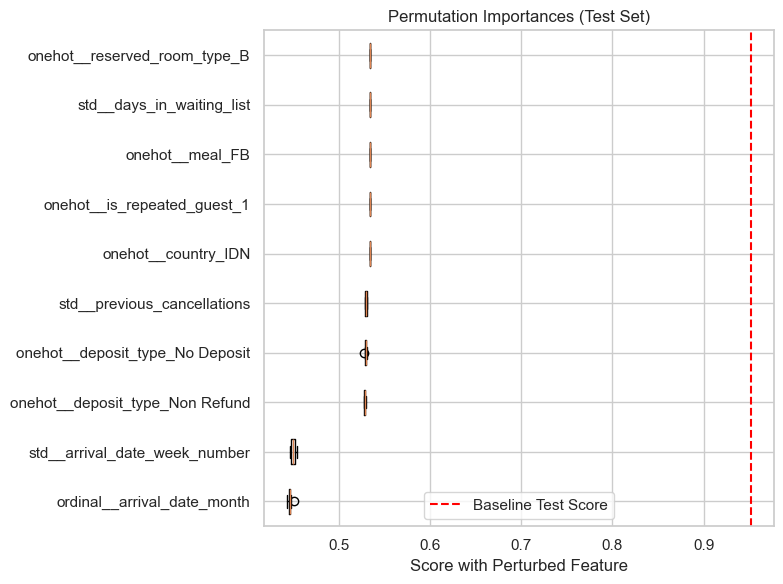


Top features by Weight:


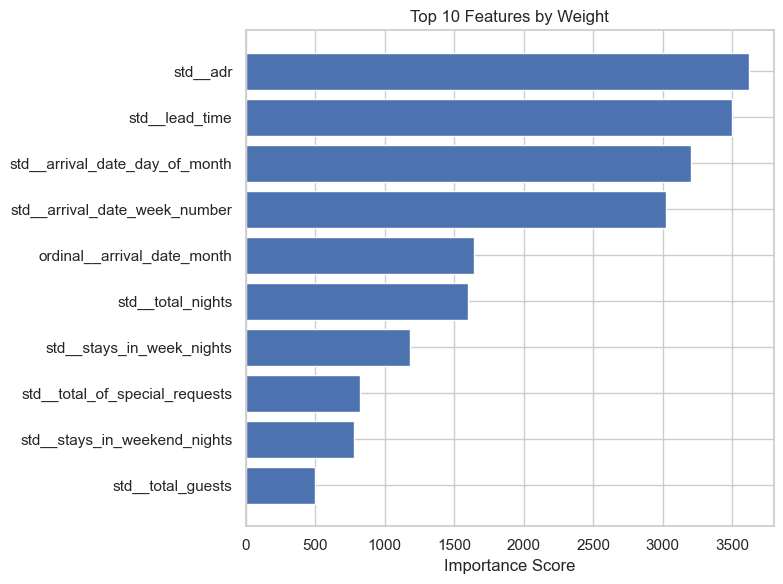


Top features by Gain:


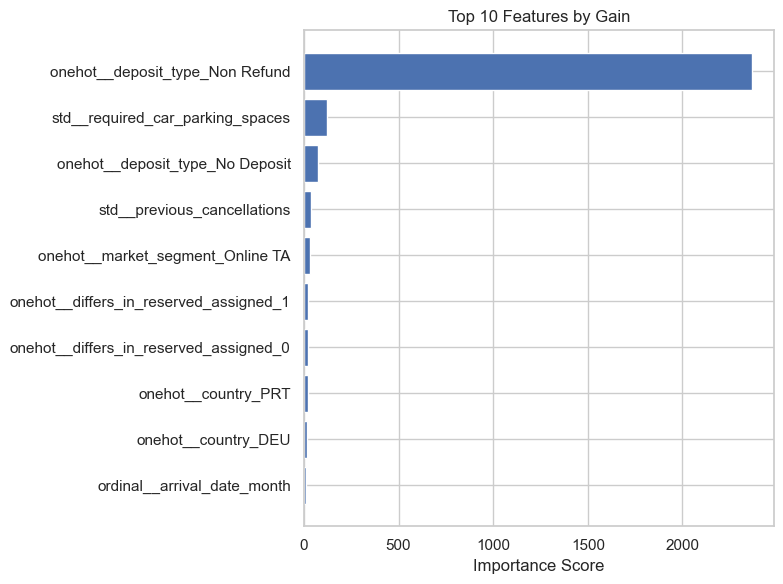


Top features by Cover:


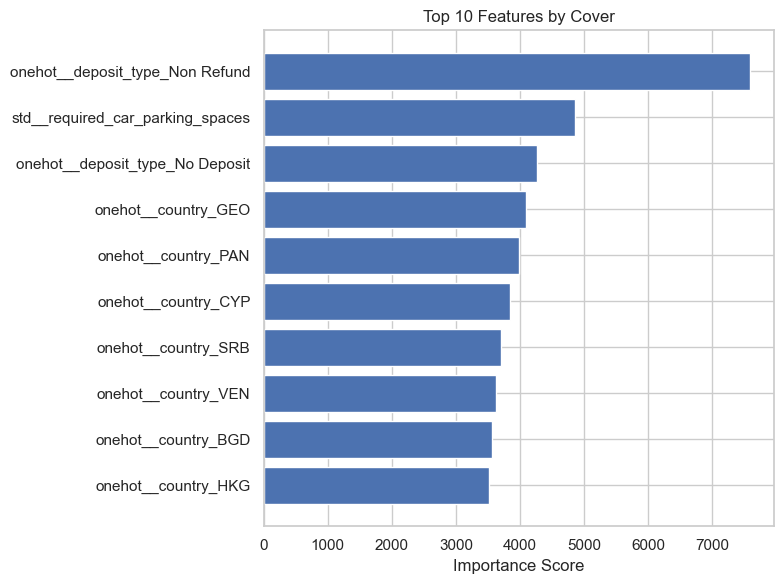


Top features by Total_gain:


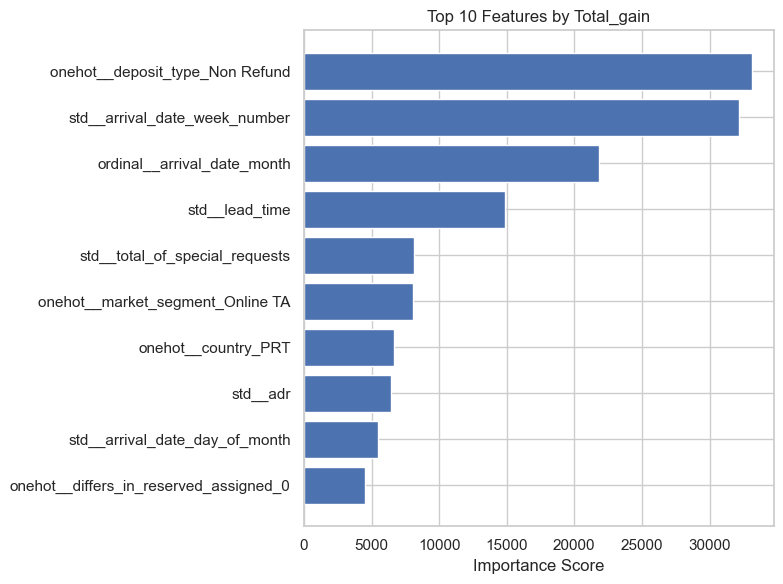


Top features by Total_cover:


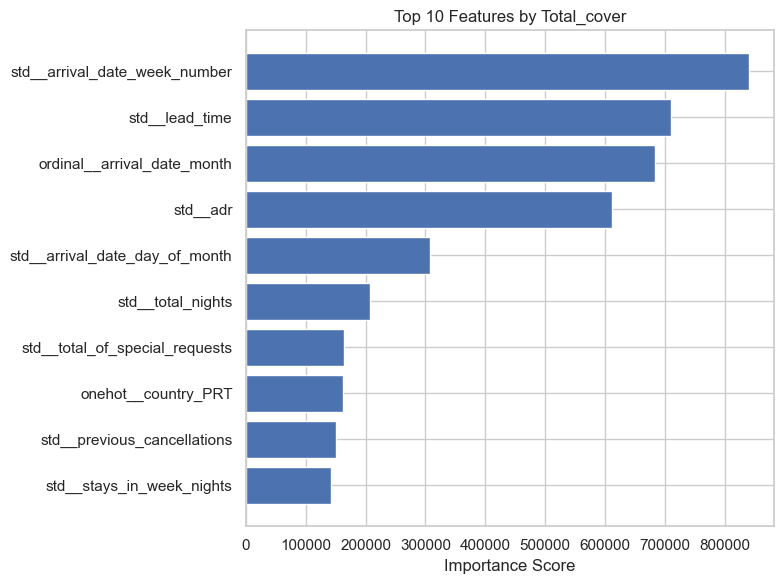

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

# Feature names from the preprocessing pipeline
ftr_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Baseline test score
y_test_pred = best_models[-1].predict(dtest)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)
baseline_score = accuracy_score(y_test, y_test_pred_binary)
print(f"Baseline Test Score: {baseline_score:.4f}")

# Initialize storage for permutation importance
nr_runs = 10  # Number of runs for shuffling
scores = np.zeros((len(ftr_names), nr_runs))

# 1. Permutation Importance
for i in range(len(ftr_names)):
    print(f"Shuffling {ftr_names[i]}")
    acc_scores = []
    for _ in range(nr_runs):
        X_test_shuffled = X_test_prep.copy()
        X_test_shuffled[:, i] = np.random.permutation(X_test_shuffled[:, i])
        dtest_shuffled = xgb.DMatrix(X_test_shuffled, label=y_test)
        y_shuffled_pred = best_models[-1].predict(dtest_shuffled)
        y_shuffled_pred_binary = (y_shuffled_pred > 0.5).astype(int)
        acc_scores.append(accuracy_score(y_test, y_shuffled_pred_binary))
    scores[i] = acc_scores

# Calculate mean decrease in accuracy
mean_decrease = baseline_score - np.mean(scores, axis=1)
sorted_indices_perm = np.argsort(mean_decrease)[::-1]

# Visualize Permutation Importance with feature names
plt.figure(figsize=(8, 6))
plt.boxplot(scores[sorted_indices_perm[:10]].T, vert=False, labels=[ftr_names[j] for j in sorted_indices_perm[:10]])
plt.axvline(baseline_score, label="Baseline Test Score", color="red", linestyle="--")
plt.title("Permutation Importances (Test Set)")
plt.xlabel("Score with Perturbed Feature")
plt.legend()
plt.tight_layout()
plt.savefig("permutation_importance_with_names.png", dpi=300) 
plt.show()

# 2. XGBoost Built-in Feature Importance
metrics = ["weight", "gain", "cover", "total_gain", "total_cover"]

# Function to map feature indices to actual names
def map_features_to_names(importance):
    feature_importance = {}
    for feature, value in importance.items():
        feature_index = int(feature[1:])  
        feature_name = ftr_names[feature_index] if feature_index < len(ftr_names) else f"Unknown ({feature})"
        feature_importance[feature_name] = value
    return feature_importance

# Function to plot XGBoost feature importance with mapped names
def plot_and_save_importance(importance, metric_name):
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:10]
    features, values = zip(*sorted_importance)

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(features)), values[::-1], align="center")
    plt.yticks(range(len(features)), features[::-1])
    plt.xlabel("Importance Score")
    plt.title(f"Top 10 Features by {metric_name.capitalize()}")
    plt.tight_layout()
    plt.savefig(f"xgboost_importance_{metric_name}_with_names.png", dpi=300)  
    plt.show()

for metric in metrics:
    raw_importance = best_models[-1].get_score(importance_type=metric)
    importance_with_names = map_features_to_names(raw_importance)
    print(f"\nTop features by {metric.capitalize()}:")
    plot_and_save_importance(importance_with_names, metric)

Selected Row Positions: [17647, 13693, 1542]


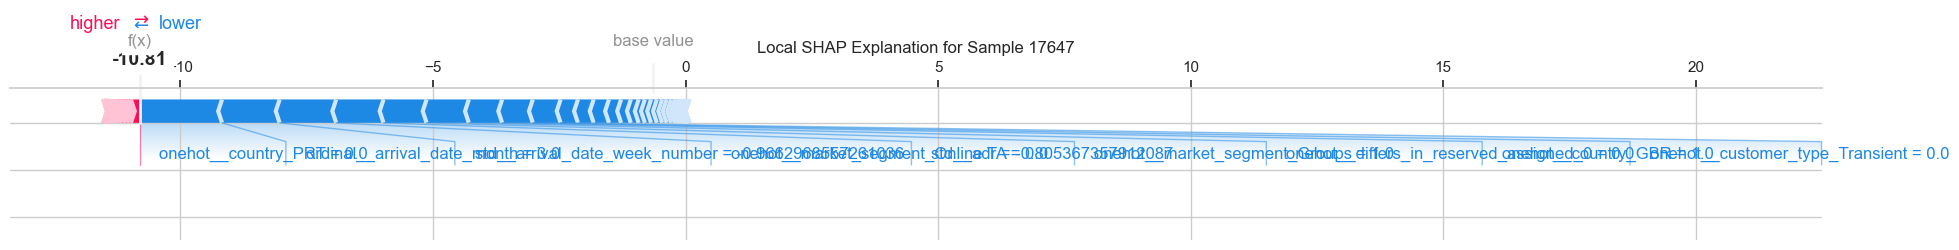

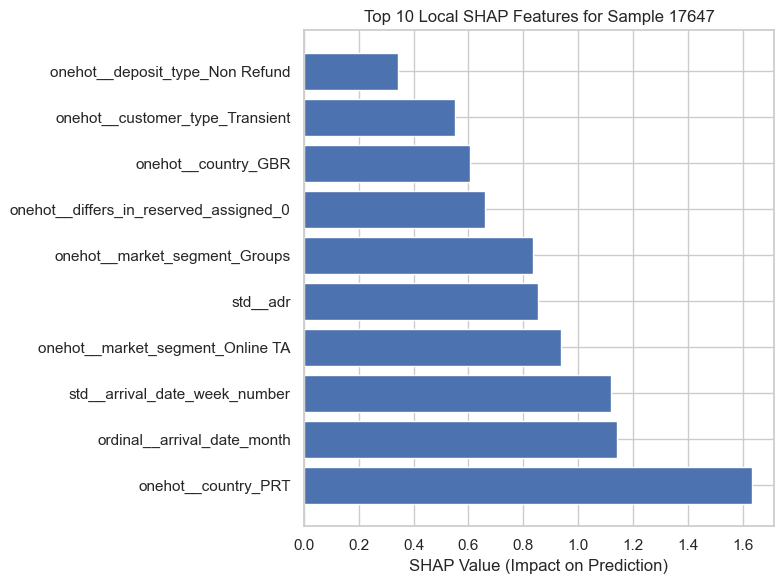

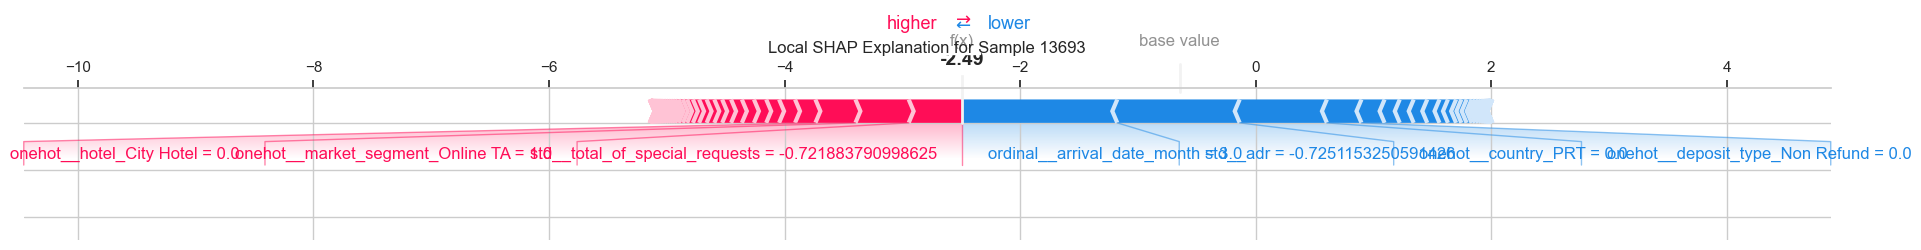

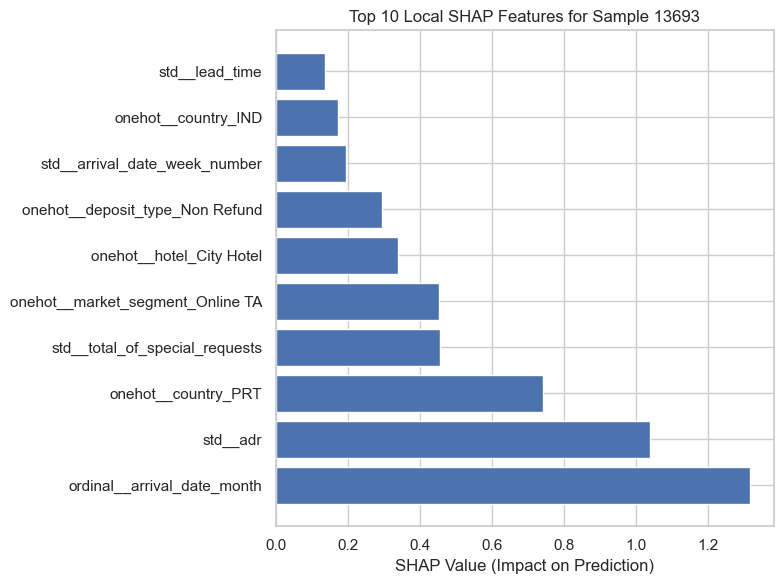

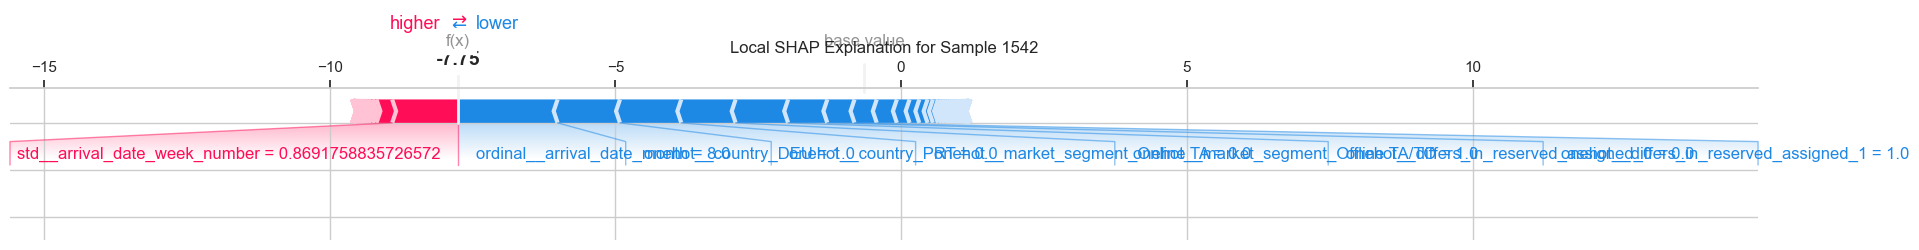

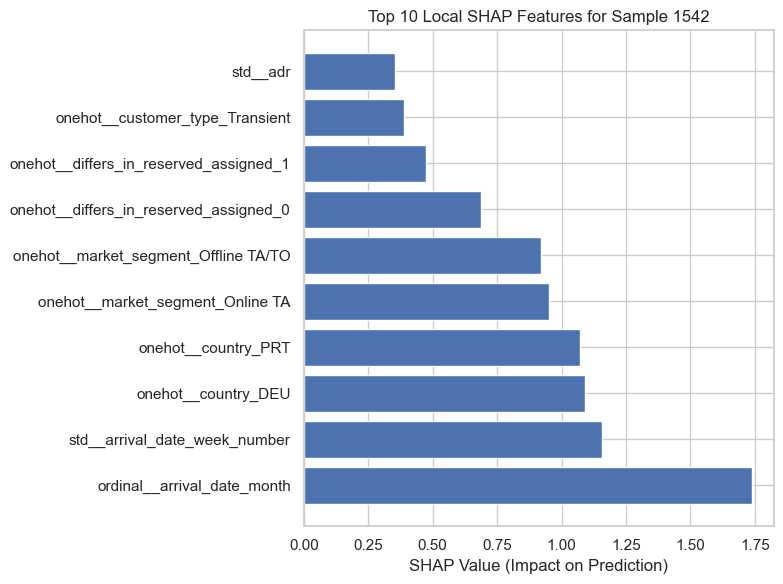


Top 10 Features by Global SHAP Importance:
ordinal__arrival_date_month: 1.6592
std__arrival_date_week_number: 1.4376
onehot__country_PRT: 0.9209
onehot__deposit_type_Non Refund: 0.6604
onehot__market_segment_Online TA: 0.5365
std__lead_time: 0.5271
std__required_car_parking_spaces: 0.5110
std__adr: 0.4336
std__total_of_special_requests: 0.4301
onehot__deposit_type_No Deposit: 0.3234


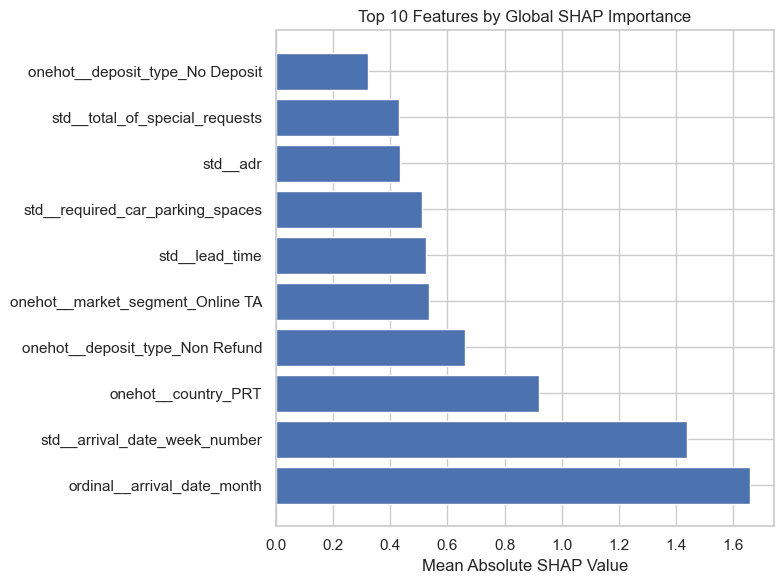

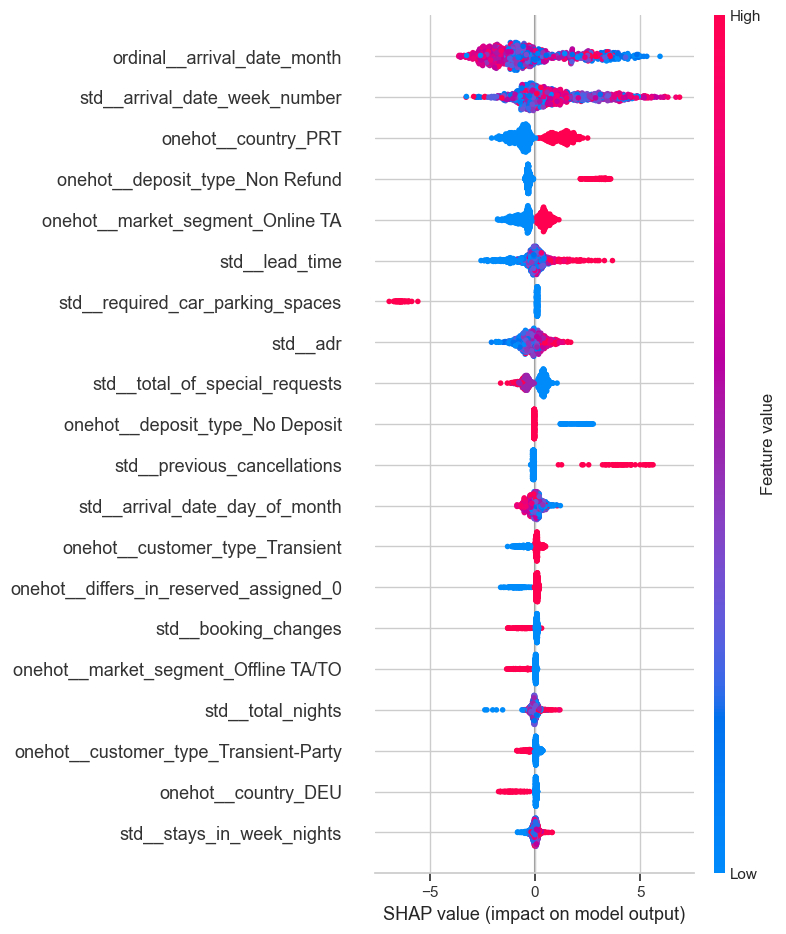

In [77]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

y_test_pred_probs = xgb_best_model.predict(dtest)
y_test_pred_binary = (y_test_pred_probs > 0.5).astype(int)

test_df = pd.DataFrame({
    "y_test": y_test.values,
    "y_pred": y_test_pred_binary,
    "pred_prob": y_test_pred_probs
}).reset_index(drop=True)

np.random.seed(42)

# Select Exactly 3 Unique Rows for SHAP Analysis
def select_three_rows(test_df):
    selected_positions = set()
    
    # Random selection
    random_position = np.random.choice(test_df.index, size=1, replace=False)
    selected_positions.update(random_position)
    
    # Stratified selection by class
    for cls in [0, 1]:
        class_indices = test_df[test_df["y_test"] == cls].index
        stratified_position = np.random.choice(class_indices, size=1, replace=False)
        selected_positions.update(stratified_position)
    
    # Incorrect prediction
    incorrect_indices = test_df[test_df["y_test"] != test_df["y_pred"]].index
    if len(incorrect_indices) > 0:
        incorrect_position = np.random.choice(incorrect_indices, size=1, replace=False)
        selected_positions.update(incorrect_position)
    
    # Return exactly 3 unique positions
    return list(selected_positions)[:3]

selected_positions = select_three_rows(test_df)
print(f"Selected Row Positions: {selected_positions}")

# Prepare SHAP Explainer and Subset of Data
X_test_array = X_test_prep
X_test_subset = X_test_array[selected_positions]

explainer = shap.TreeExplainer(xgb_best_model)

# SHAP Values for Selected Rows
shap_values = explainer.shap_values(X_test_subset)
if isinstance(shap_values, list):  # Handle binary classification
    shap_values = shap_values[1]
elif len(shap_values.shape) == 3:  # Handle multi-class SHAP values
    shap_values = shap_values[:, :, 1]

# Ensure feature names match SHAP values
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Generate Force Plots and Top 10 Features for Local Explanations
for idx, position in enumerate(selected_positions):
    # Local SHAP explanation (force plot)
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx],
        X_test_subset[idx],
        feature_names=feature_names,
        matplotlib=True,
        show=False
    )
    plt.title(f"Local SHAP Explanation for Sample {position}")
    plt.tight_layout()
    plt.savefig(f"force_plot_sample_{position}.png", dpi=300)
    plt.show()

    # Top 10 features by SHAP values for the sample
    shap_values_sample = shap_values[idx]
    shap_values_abs = np.abs(shap_values_sample)
    sorted_indices = np.argsort(shap_values_abs)[-10:]  # Top 10 features
    sorted_features = feature_names[sorted_indices]
    sorted_importances = shap_values_abs[sorted_indices]

    plt.figure(figsize=(8, 6))
    plt.barh(sorted_features[::-1], sorted_importances[::-1], align="center")
    plt.xlabel("SHAP Value (Impact on Prediction)")
    plt.title(f"Top 10 Local SHAP Features for Sample {position}")
    plt.tight_layout()
    plt.savefig(f"top10_shap_sample_{position}.png", dpi=300)
    plt.show()

# Global SHAP Feature Importance
shap_values_global = explainer.shap_values(X_test_array[:1000])
if isinstance(shap_values_global, list):  # Handle binary classification
    shap_values_global = shap_values_global[1]
elif len(shap_values_global.shape) == 3:  # Handle multi-class SHAP values
    shap_values_global = shap_values_global[:, :, 1]

shap_summary = np.abs(shap_values_global).mean(axis=0)

# Top 10 Features Globally
top_indices = np.argsort(shap_summary)[-10:]
top_features = feature_names[top_indices]
top_importances = shap_summary[top_indices]

print("\nTop 10 Features by Global SHAP Importance:")
for feature, score in zip(top_features[::-1], top_importances[::-1]):
    print(f"{feature}: {score:.4f}")

plt.figure(figsize=(8, 6))
plt.barh(top_features[::-1], top_importances[::-1], align="center")
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Features by Global SHAP Importance")
plt.tight_layout()
plt.savefig("global_shap_importance.png", dpi=300)
plt.show()

shap.summary_plot(shap_values_global, X_test_array[:1000], feature_names=feature_names)

In [74]:
# Calculate baseline accuracy
baseline_accuracy = y.value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.6293
